
# Diseño de software para cómputo científico

----

## Unidad 3: Patrones de diseño


# Patrones de diseño
----

> Los patrones de diseño son soluciones habituales a problemas que ocurren con frecuencia en el diseño de software. Son como planos prefabricados que se pueden personalizar para resolver un problema de diseño recurrente en tu código.

No se puede elegir un patrón y copiarlo en el programa como si se tratara de funciones o bibliotecas ya preparadas. 

El patrón **no es** una porción específica de código, sino un concepto general para resolver un problema particular. 

A menudo los patrones se confunden con algoritmos porque ambos conceptos describen soluciones típicas a problemas conocidos. Mientras que un algoritmo siempre define un grupo claro de acciones para lograr un objetivo, un patrón es una descripción de más alto nivel de una solución. El código del mismo patrón aplicado a dos programas distintos puede ser diferente.
 

# Historia

El concepto de los patrones fue descrito por Christopher Alexander en *El lenguaje de patrones*. El libro habla de un “lenguaje” para diseñar el entorno urbano. Las unidades de este lenguaje son los patrones. Pueden describir lo altas que tienen que ser las ventanas, cuántos niveles debe tener un edificio, cuan grandes deben ser las zonas verdes de un barrio, etcétera.

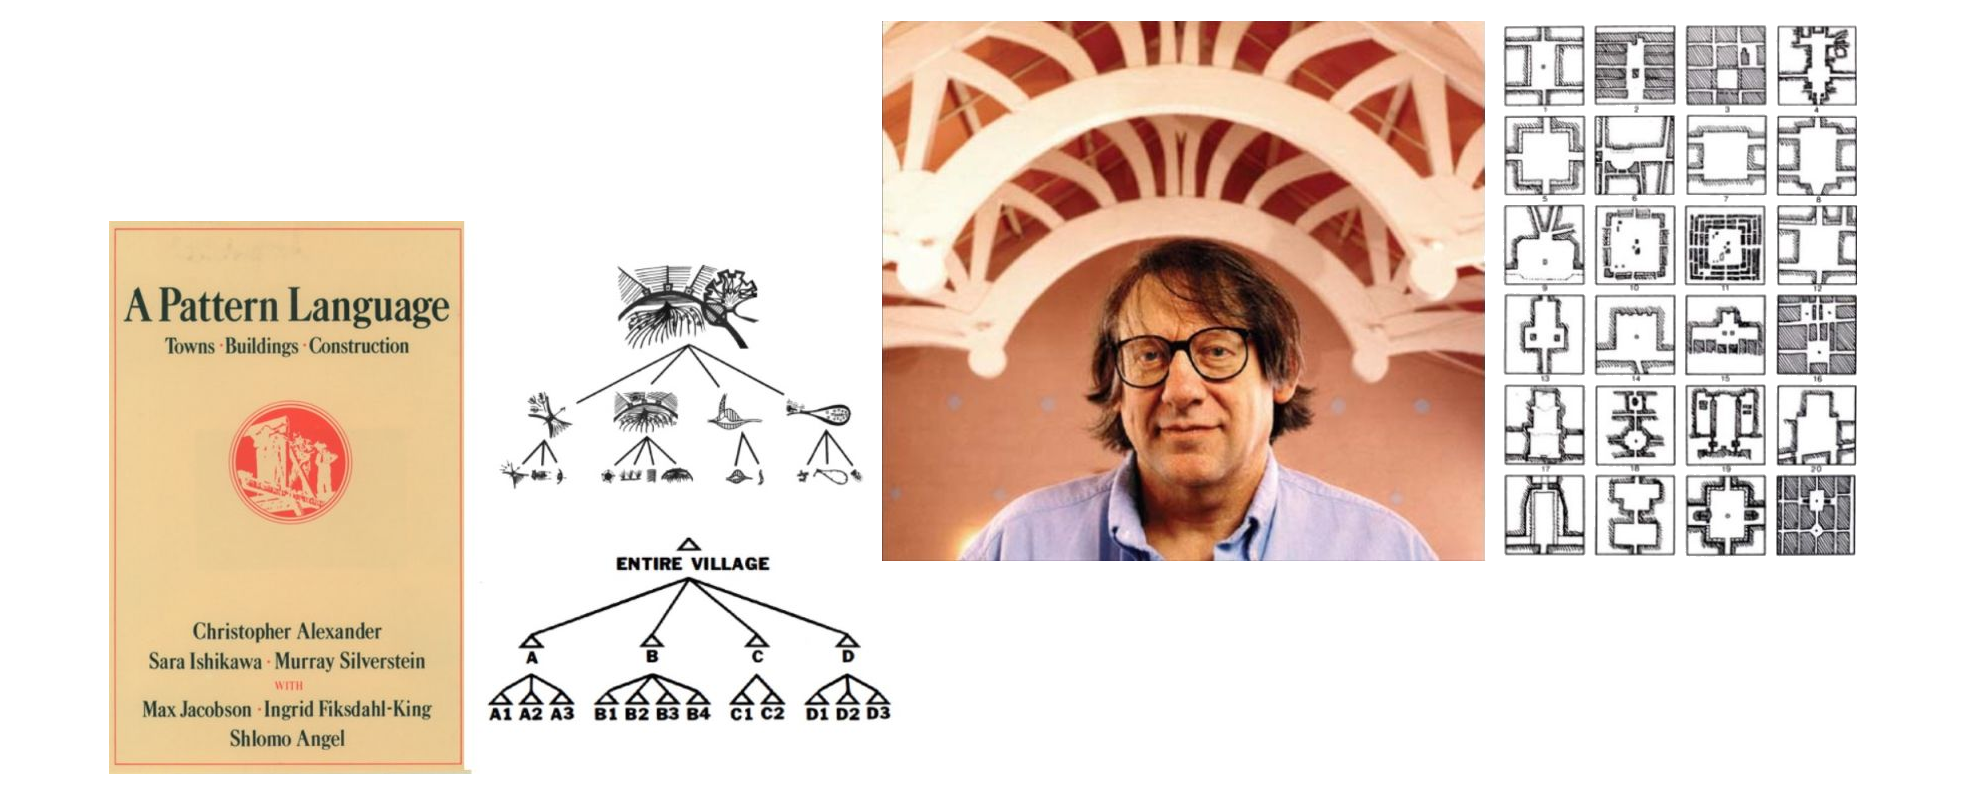



# Historia

La idea fue recogida por cuatro autores: Erich Gamma, John Vlissides, Ralph Johnson y Richard Helm. En 1995, publicaron *Patrones de diseño*, en el que aplicaron el concepto de los patrones de diseño a la programación. 

El libro presentaba 23 patrones que resolvían varios problemas del diseño orientado a objetos.

La gente empezó a llamarlo “el libro de la ‘gang of four’ (banda de los cuatro)”, lo que pronto se abrevió a “el libro GoF”.

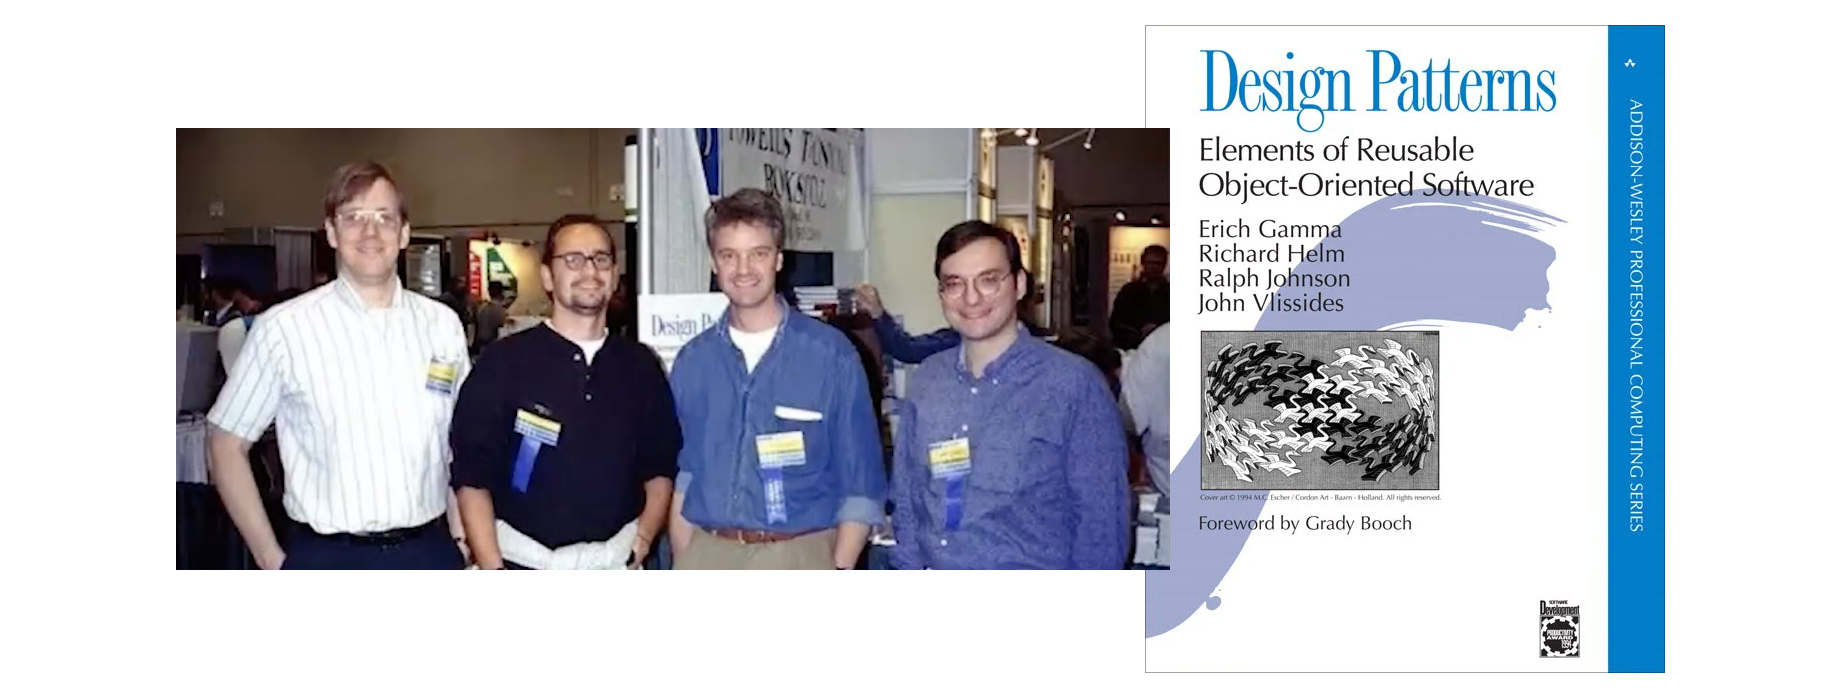


# ¿Por qué debería aprender sobre patrones?



- Sin saber patrones los vas implementar sin saberlo. 

- Los patrones de diseño son un juego de herramientas de soluciones comprobadas a problemas habituales en el diseño de software. 

- Los patrones de diseño definen un lenguaje común que puedes utilizar con tus compañeros de equipo para comunicaros de forma más eficiente. Podrías decir: “Oh, utiliza un singleton para eso”, y todos entenderían la idea de tu sugerencia. No habría necesidad de explicar qué es un singleton si conocen el patrón y su nombre.

- No son propios de la orientación a objetos.

# Críticas

- **Basura para un lenguaje de programación débil**

  Los patrones se convierten en una boirleplate que otorga al lenguaje con pobres abstracciones unas súper 
  habilidades muy necesitadas.
  Por ejemplo, el patrón `Factory` puede implementarse con una simple función anónima en la mayoría de lenguajes de programación modernos.
  
- **Soluciones ineficientes**

  Los patrones intentan sistematizar soluciones cuyo uso ya es generalizado. 
  Esta unificación es vista por muchos como un dogma, e implementan los patrones “al pie de la letra”, sin 
  adaptarlos al contexto del proyecto particular.
  
- **Uso injustificado**

  > Si lo único que tienes es un martillo, todo te parecerá un clavo.

  Muchos principiantes que acaban de familiarizarse con los patrones intentan aplicarlos en todas partes, 
  incluso en situaciones en las que un código más simple funcionaría perfectamente bien.


# Clasificación de los patrones

Los patrones más básicos y de más bajo nivel suelen llamarse *idioms*. Normalmente se aplican a un único lenguaje de programación.

Los patrones más universales y de más alto nivel son los patrones de *arquitectura*. Los desarrolladores pueden implementar estos patrones prácticamente en cualquier lenguaje. 

Además, todos los patrones pueden clasificarse por su propósito. Este libro cubre tres grupos generales de patrones:

- **Creacionales**
- **Estructurales**
- **Comportamiento**

- Los patrones de **comportamiento** se encargan de una comunicación efectiva y la asignación de responsabilidades entre objetos.


# Patrones creacionales

Los patrones **creacionales** proporcionan mecanismos de creación de objetos que incrementan la flexibilidad y la reutilización de código existente.

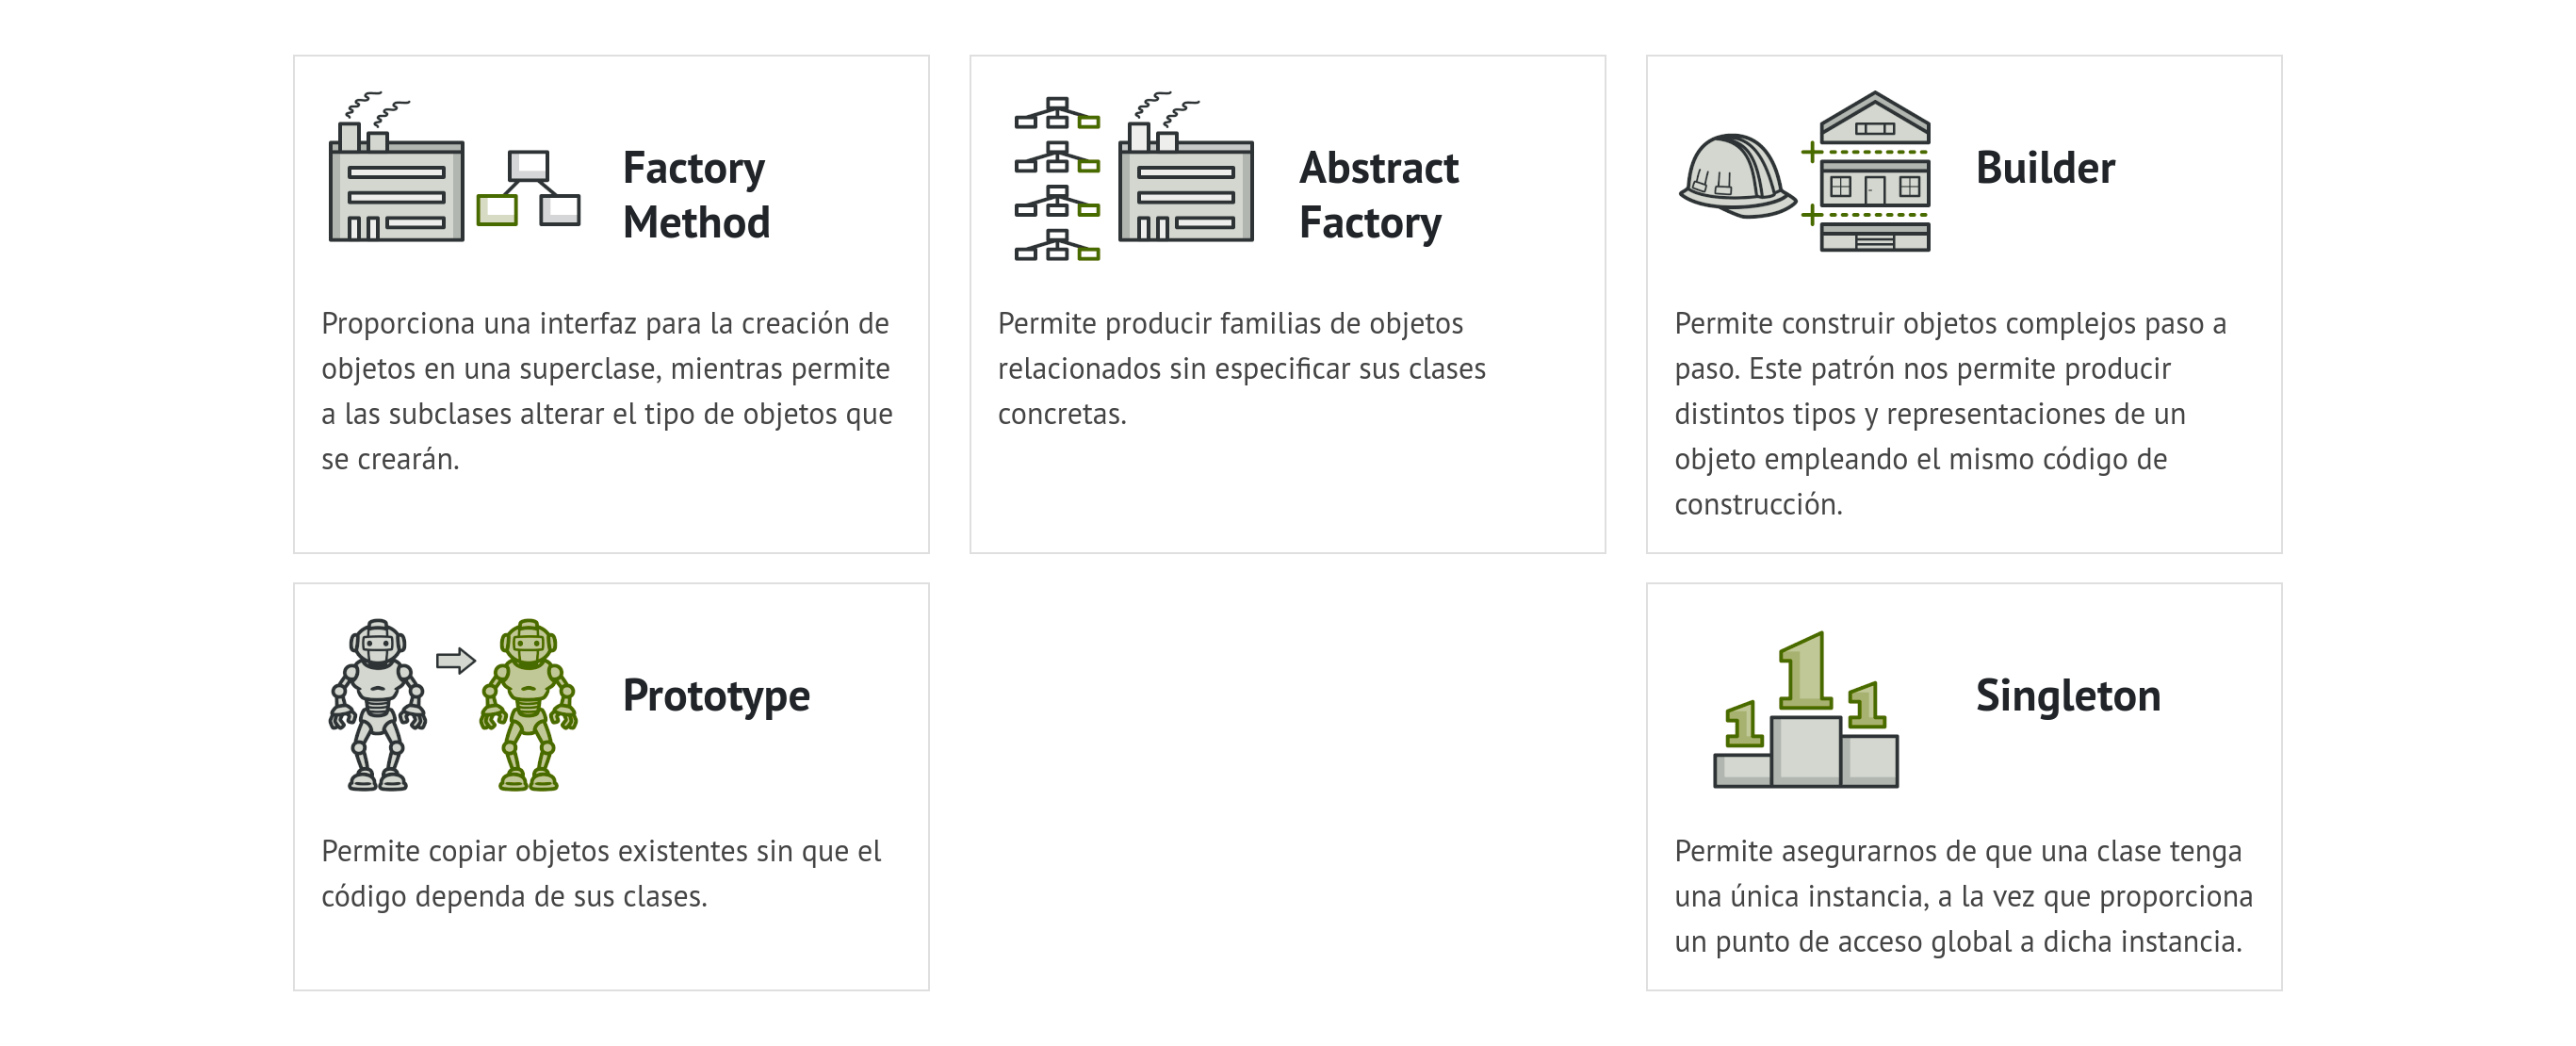

## Patrones creacionales - Singleton

Singleton es un patrón de diseño creacional que nos permite asegurarnos de que una clase tenga una única instancia, a la vez que proporciona un punto de acceso global a dicha instancia.

Resuelve dos problemas al mismo tiempo, *vulnerando el Principio de responsabilidad única*:

- Garantizar que una clase tenga una única instancia. ¿Por qué querría alguien controlar cuántas instancias tiene una clase? El motivo más habitual es controlar el acceso a algún recurso compartido, por ejemplo, una base de datos o un archivo.

- Proporcionar un punto de acceso global a dicha instancia. Evita variables globales.

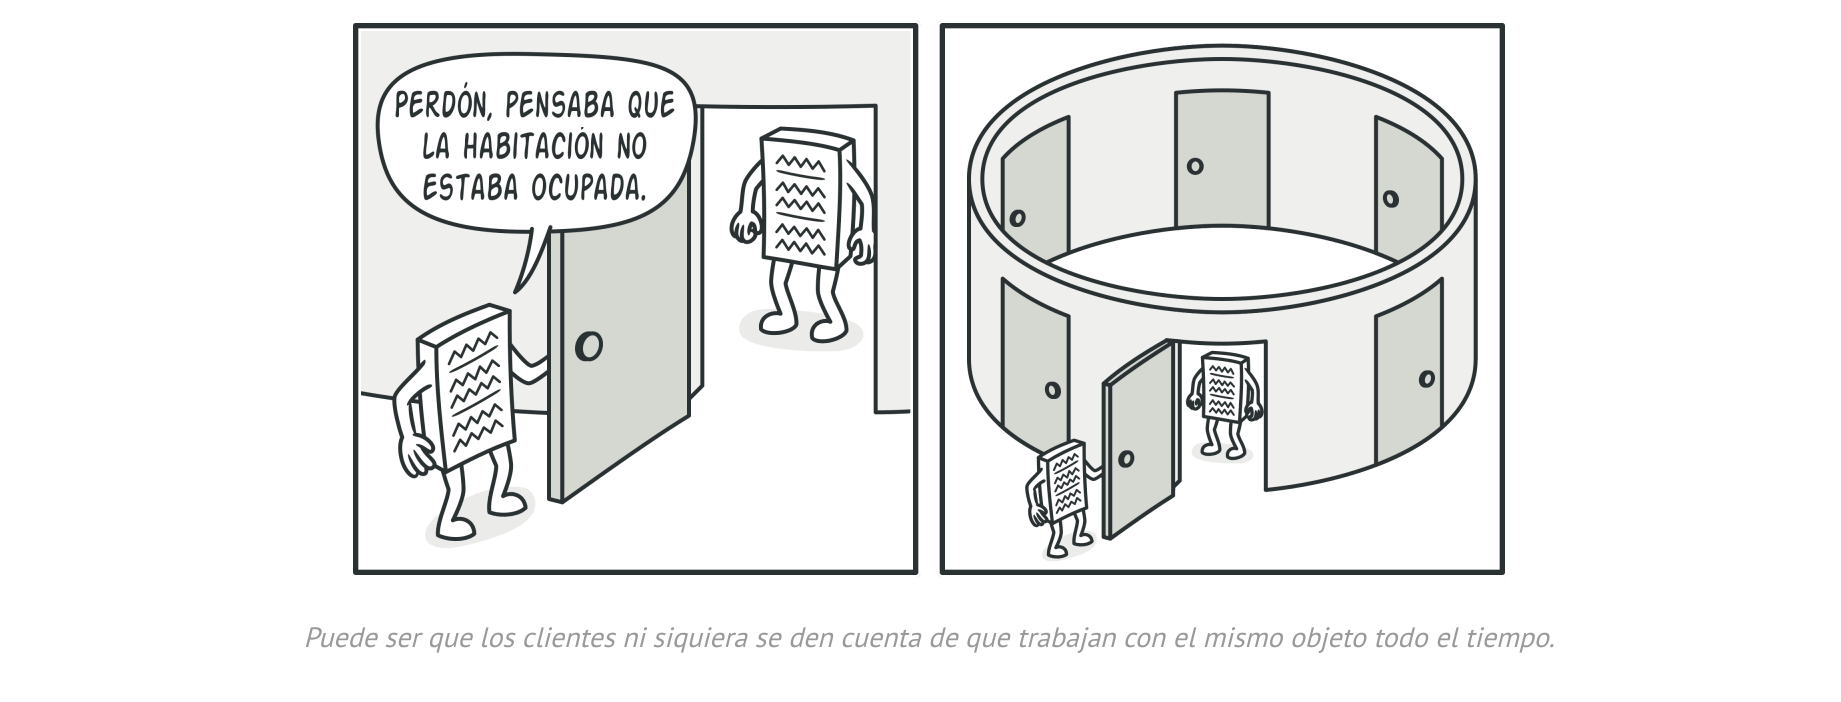

## Patrones creacionales - Singleton

Todas las implementaciones del patrón Singleton tienen estos dos pasos en común:

- Hacer privado el constructor por defecto para evitar que otros objetos utilicen el operador new con la clase Singleton.
- Crear un método de creación estático que actúe como constructor. 

Este método invoca al constructor privado para crear un objeto y lo guarda en un campo estático. Las siguientes llamadas a este método devuelven el objeto almacenado en caché.

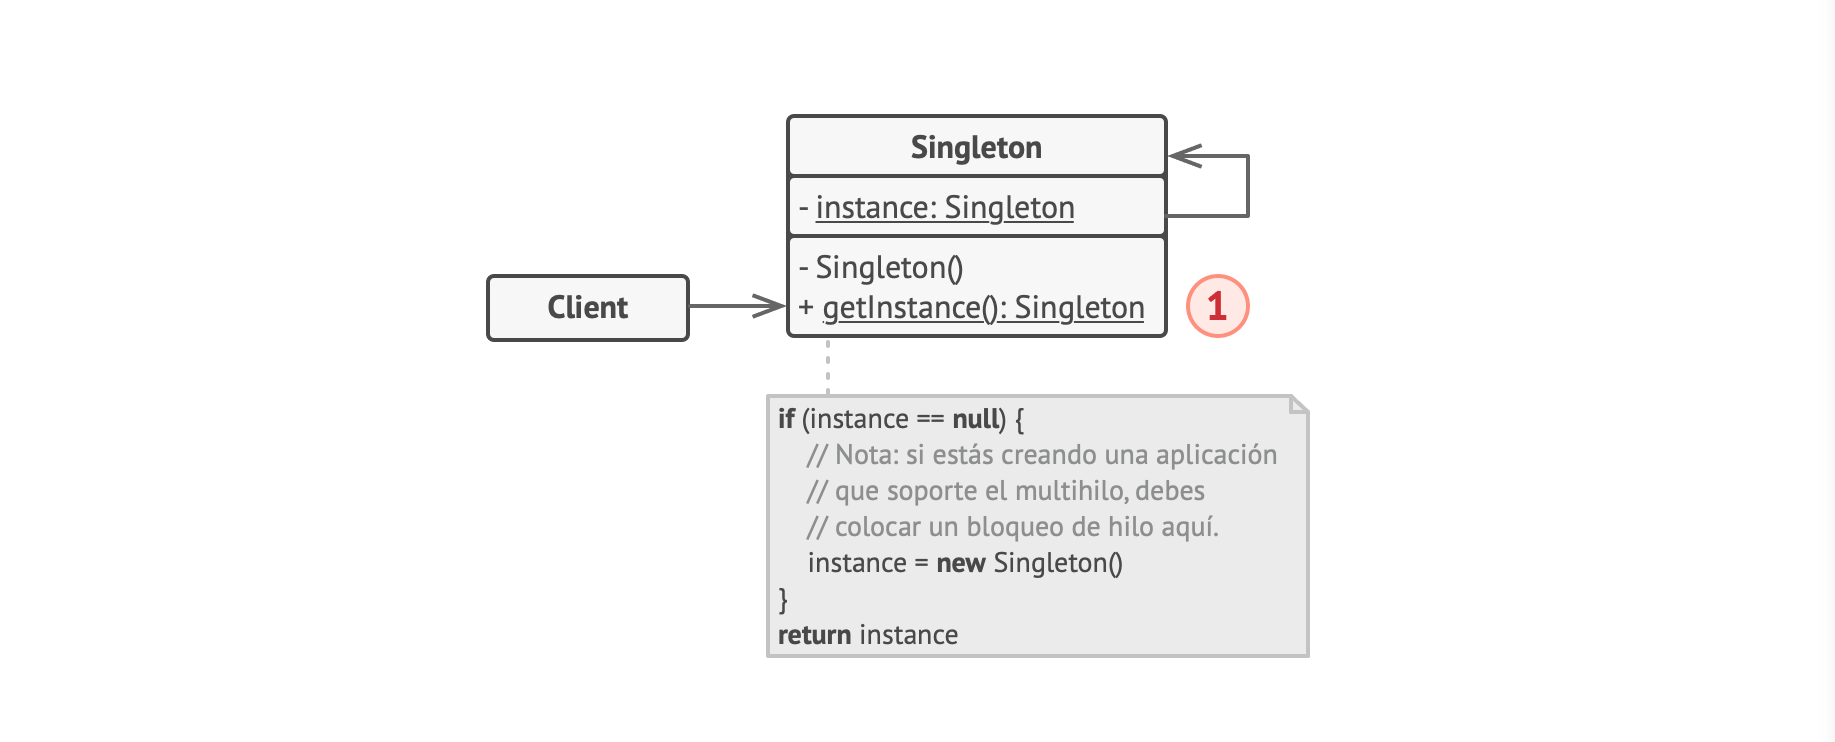

## Patrones creacionales - Singleton

Todas las implementaciones del patrón Singleton tienen estos dos pasos en común:

- Hacer privado el constructor por defecto para evitar que otros objetos utilicen el operador new con la clase Singleton.
- Crear un método de creación estático que actúe como constructor. 

Este método invoca al constructor privado para crear un objeto y lo guarda en un campo estático. Las siguientes llamadas a este método devuelven el objeto almacenado en caché.

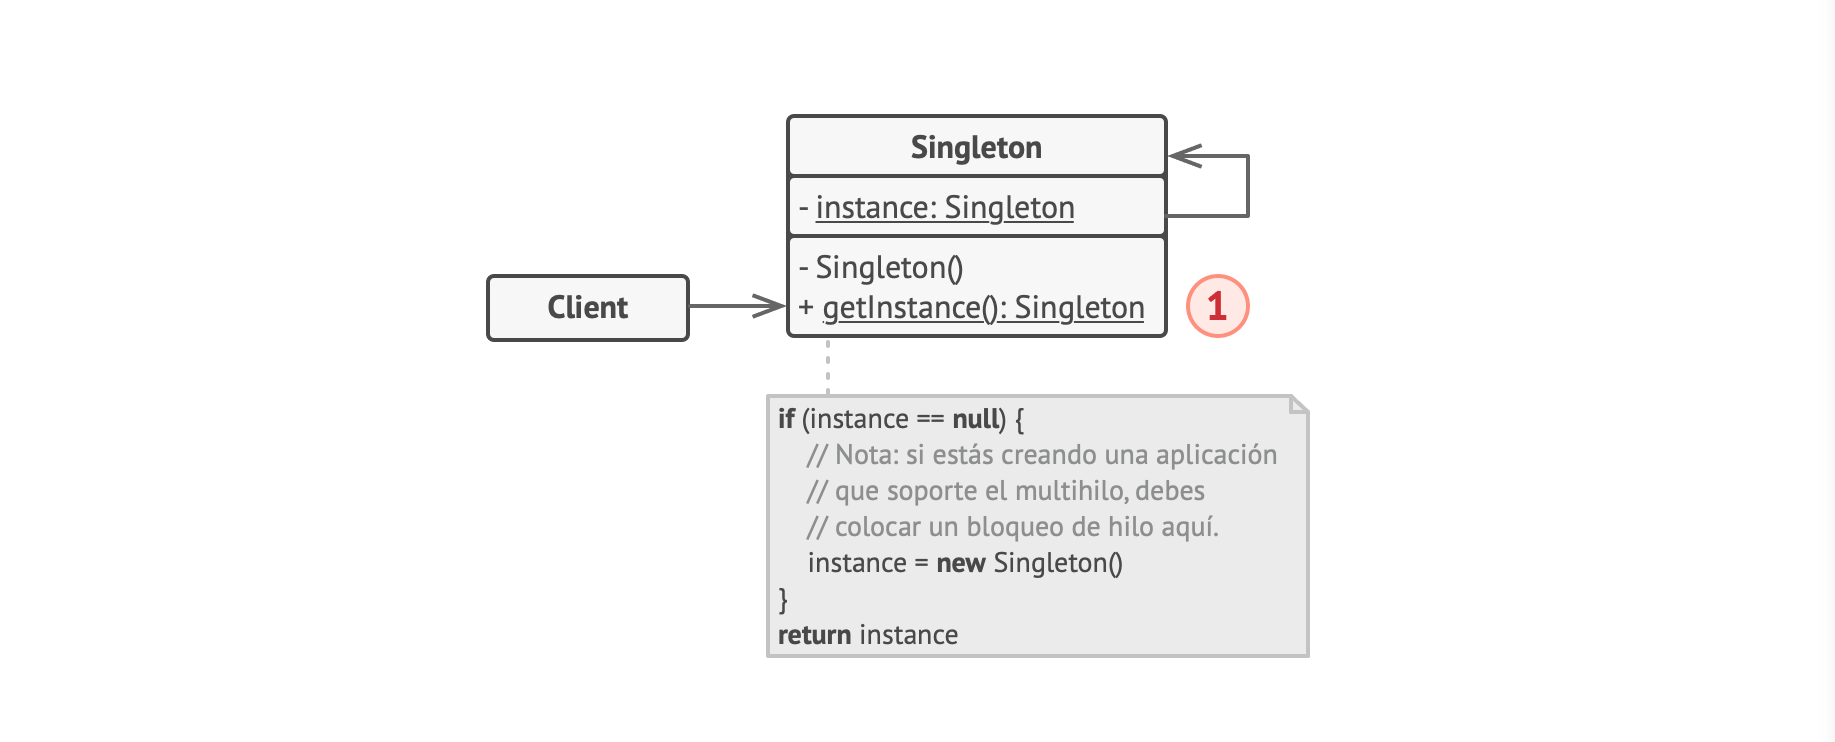

## Patrones creacionales - Singleton - Python

Muchos desarrolladores consideran el patrón Singleton un antipatrón. Por este motivo, su uso está en declive en el código Python.

El patrón Singleton se puede reconocer por un método de creación estático, que devuelve el mismo objeto guardado en caché. Ejemplo `NoneType`.

Es importante acceder al constructor `__new__()` de la clase a implementar.

Esta es la implementación mas simple

In [11]:
class MiSingleton:
    
    def __new__(cls, *args, **kwargs):
        if not hasattr(cls, "__instance"): 
            instance = super().__new__(cls, *args, **kwargs)
            setattr(cls, "__instance", instance)
        return getattr(cls, "__instance")
    
obj = MiSingleton()
obj

In [12]:
MiSingleton() 

## Patrones creacionales - Singleton - Crítica

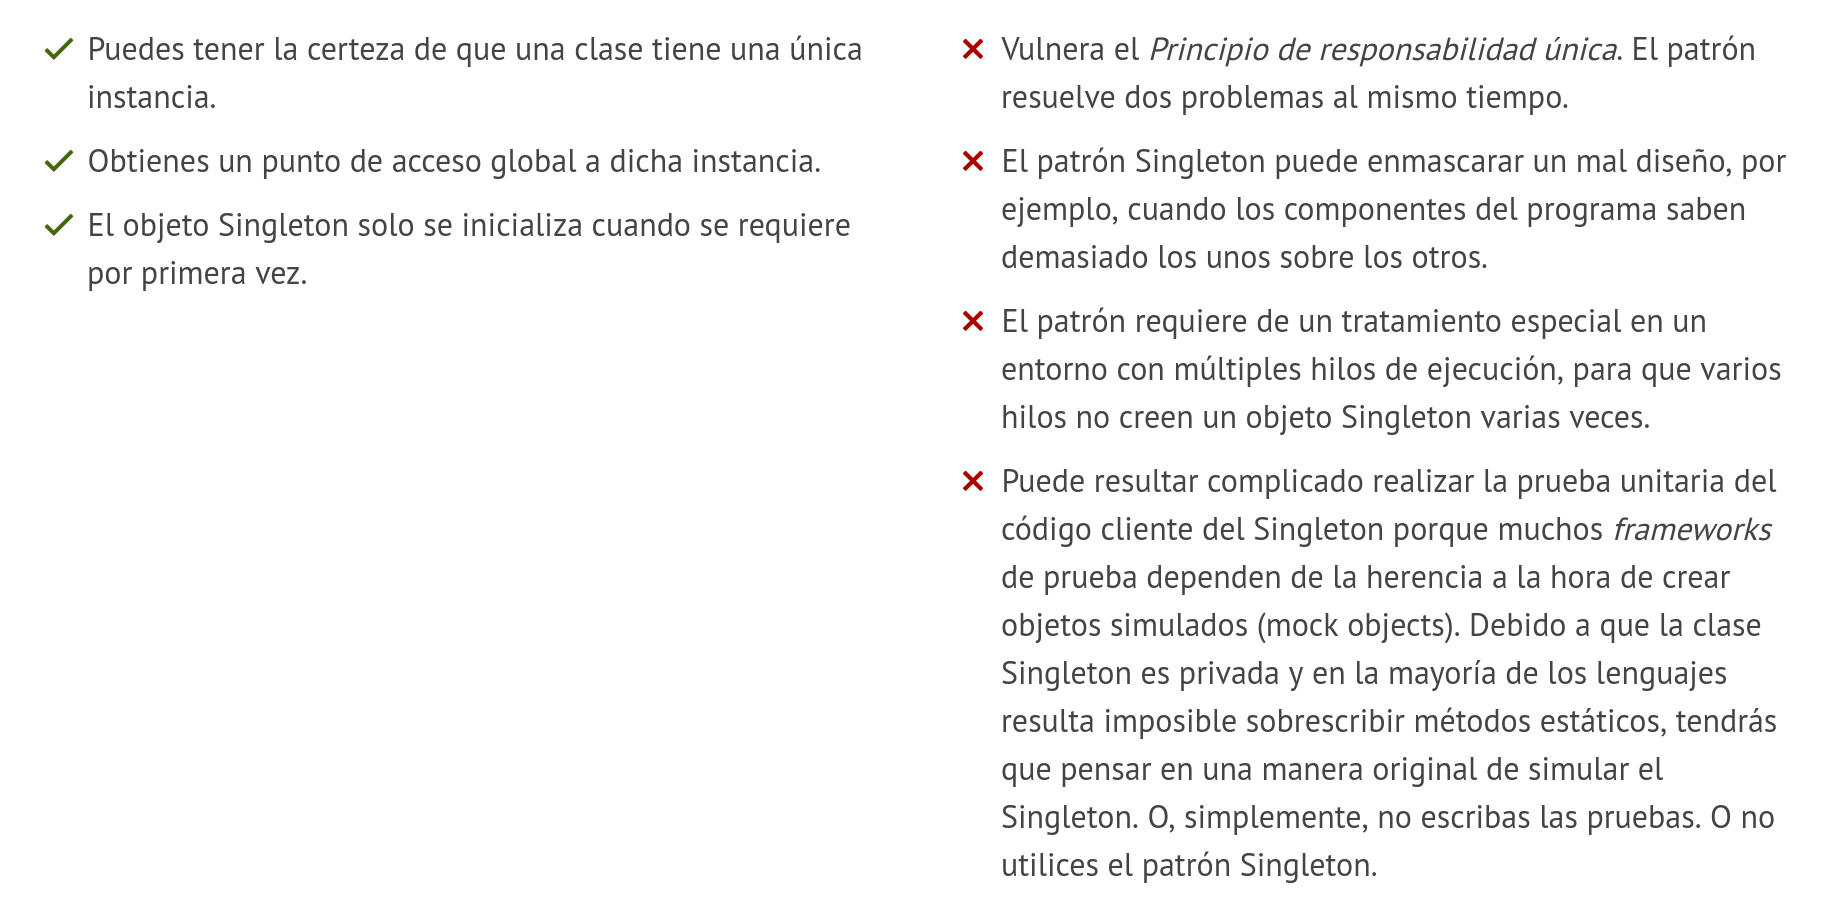

## Patrones creacionales - Factory Method

Factory Method es un patrón de diseño creacional que proporciona una interfaz para crear objetos en una superclase, mientras permite a las subclases alterar el tipo de objetos que se crearán.

**Problema**

Estás creando una aplicación de gestión logística. La primera versión de tu aplicación sólo es capaz de manejar el transporte en camión, por lo que la mayor parte de tu código se encuentra dentro de la clase Camión.

Tu aplicación se vuelve bastante popular. Eventualmente necesitas logística por mar a la aplicación (barcos).

 Para añadir barcos a la aplicación habría que hacer cambios en toda la base del código. Además, si más tarde decides añadir otro tipo de transporte a la aplicación, probablemente tendrás que volver a hacer todos estos cambios.

Al final acabarás con un código bastante sucio, plagado de condicionales que cambian el comportamiento de la aplicación dependiendo de la clase de los objetos de transporte.

## Patrones creacionales - Factory Method

El patrón Factory Method sugiere que, en lugar de llamar al operador `new` para construir objetos directamente, se invoque a un método fábrica especial. Los objetos devueltos por el método fábrica a menudo se denominan productos.

**Todos los productos deben tener la misma interfaz**

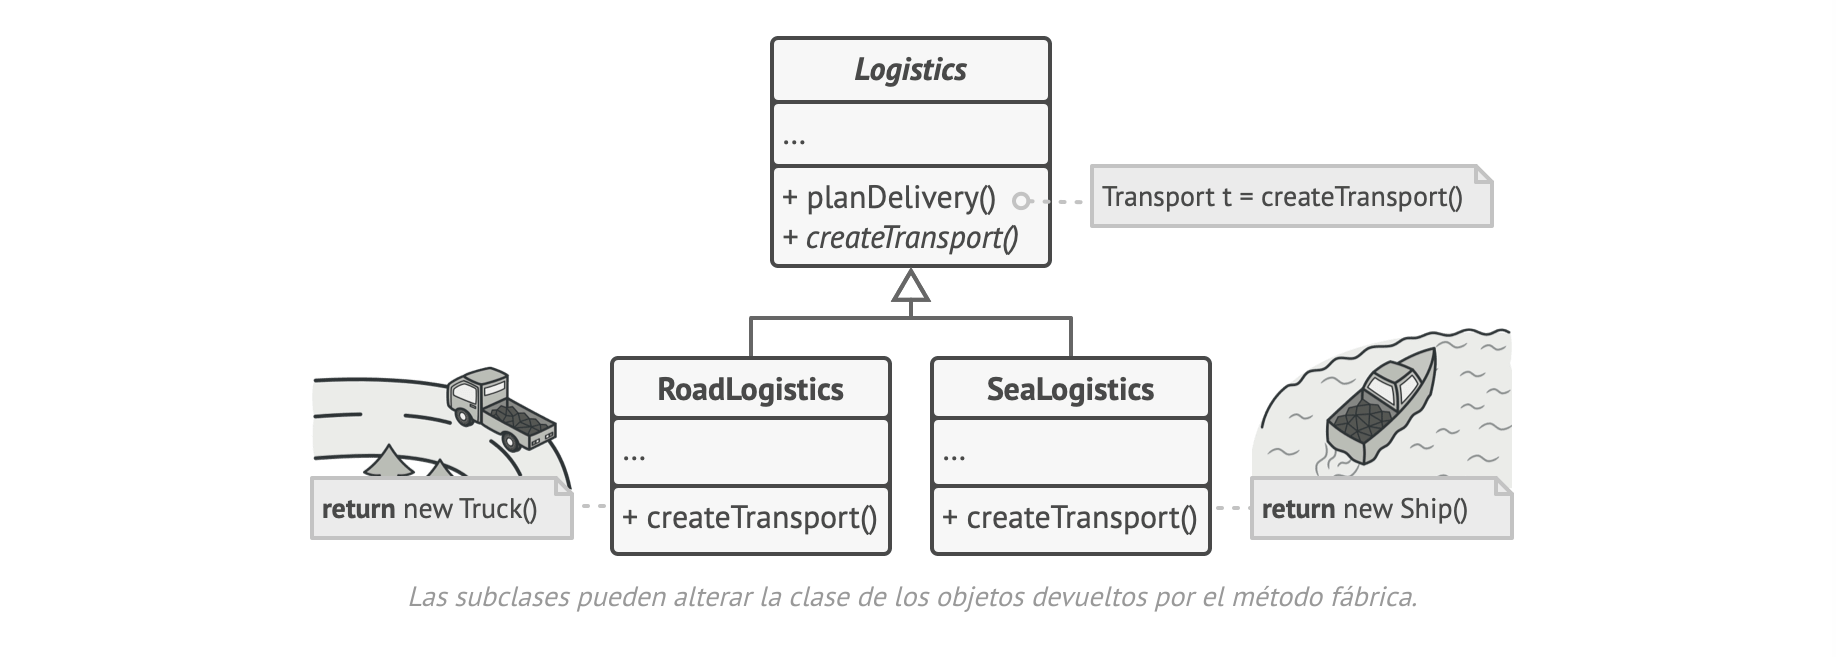

## Patrones creacionales - Factory Method

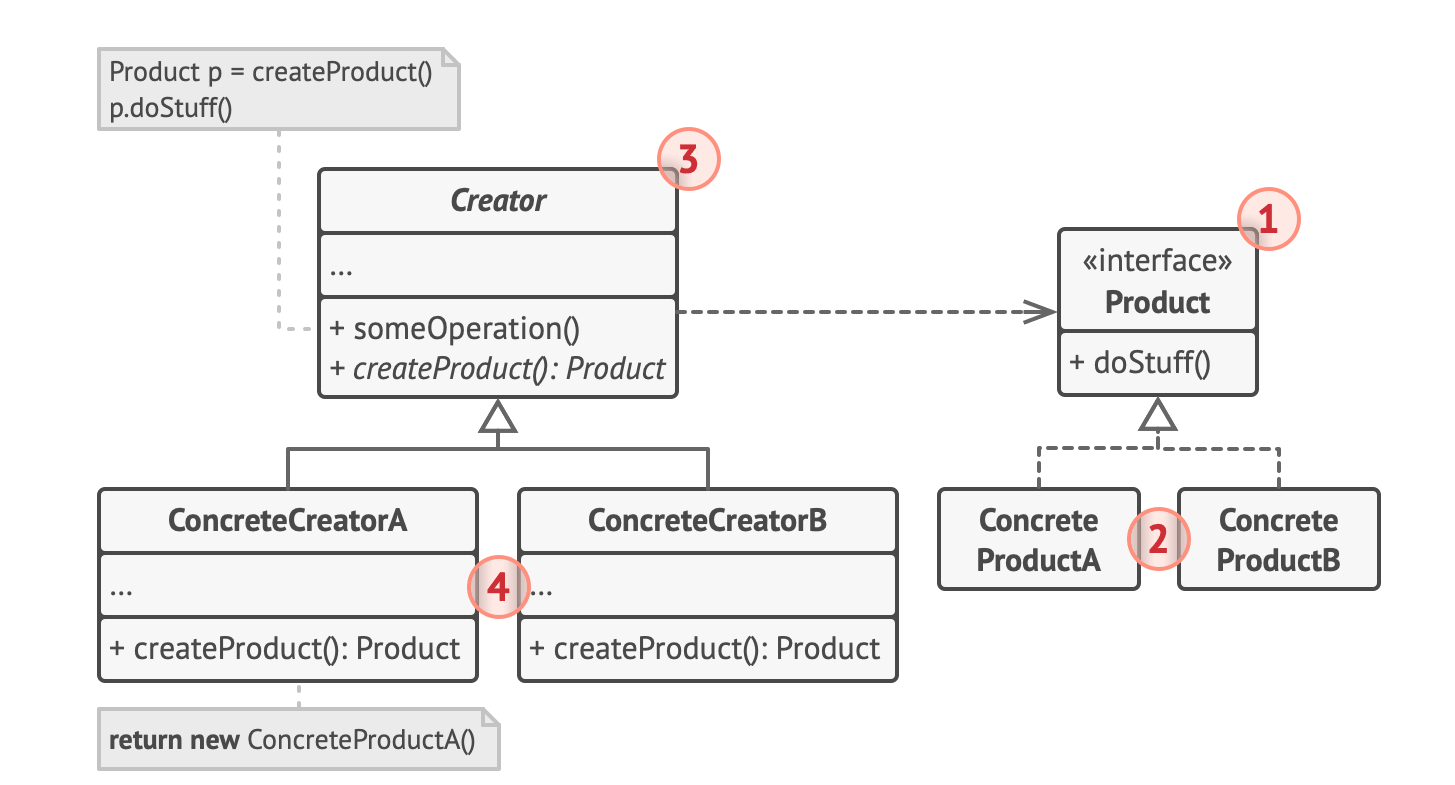 

## Patrones creacionales - Factory Method - Python

En python se puede implementar con funciones la parte de los contructores.

In [13]:
# objetos a construir usemos bool, str, int y float

def list_to_type(l, dtype):
    if dtype == bool:
        return [bool(e) for e in l]
    elif dtype == str:
        return [str(e) for e in l]
    elif dtype == int:
        return [int(e) for e in l]
    elif dtype == float:
        return [float(e) for e in l]
    raise TypeError()

list_to_type([1, "2", True, 4.5, 0], int)

[1, 2, 1, 4, 0]

In [14]:
list_to_type([1, "2", True, 4.5, 0], bool)

[True, True, True, True, False]

In [15]:
list_to_type([1, "2", True, 4.5, 0], float)

[1.0, 2.0, 1.0, 4.5, 0.0]

## Patrones creacionales - Factory Method - Python

En python se puede implementar con funciones la parte de los contructores.

In [16]:
# objetos a construir usemos bool, str, int y float

def list_to_type(l, dtype):
    if dtype not in (bool, str, int, float):
        raise TypeError()
    return [dtype(e) for e in l]

list_to_type([1, "2", True, 4.5, 0], int)

[1, 2, 1, 4, 0]

In [17]:
list_to_type([1, "2", True, 4.5, 0], bool)

[True, True, True, True, False]

In [18]:
list_to_type([1, "2", True, 4.5, 0], float)

[1.0, 2.0, 1.0, 4.5, 0.0]

## Patrones creacionales - Factory Method - Python

En python se puede implementar con funciones la parte de los contructores.

In [19]:
# objetos a construir usemos bool, str, int y float

def list_to_type(l, dtype):
    if dtype not in (bool, str, int, float):
        raise TypeError()
    return list(map(dtype, l))

list_to_type([1, "2", True, 4.5, 0], int)

[1, 2, 1, 4, 0]

In [20]:
list_to_type([1, "2", True, 4.5, 0], bool)

[True, True, True, True, False]

In [21]:
list_to_type([1, "2", True, 4.5, 0], float)

[1.0, 2.0, 1.0, 4.5, 0.0]

Como notarán `numpy.array()` es un *Factory Method* de `numpy.ndarray()`

## Patrones creacionales - Factory Method - Crítica

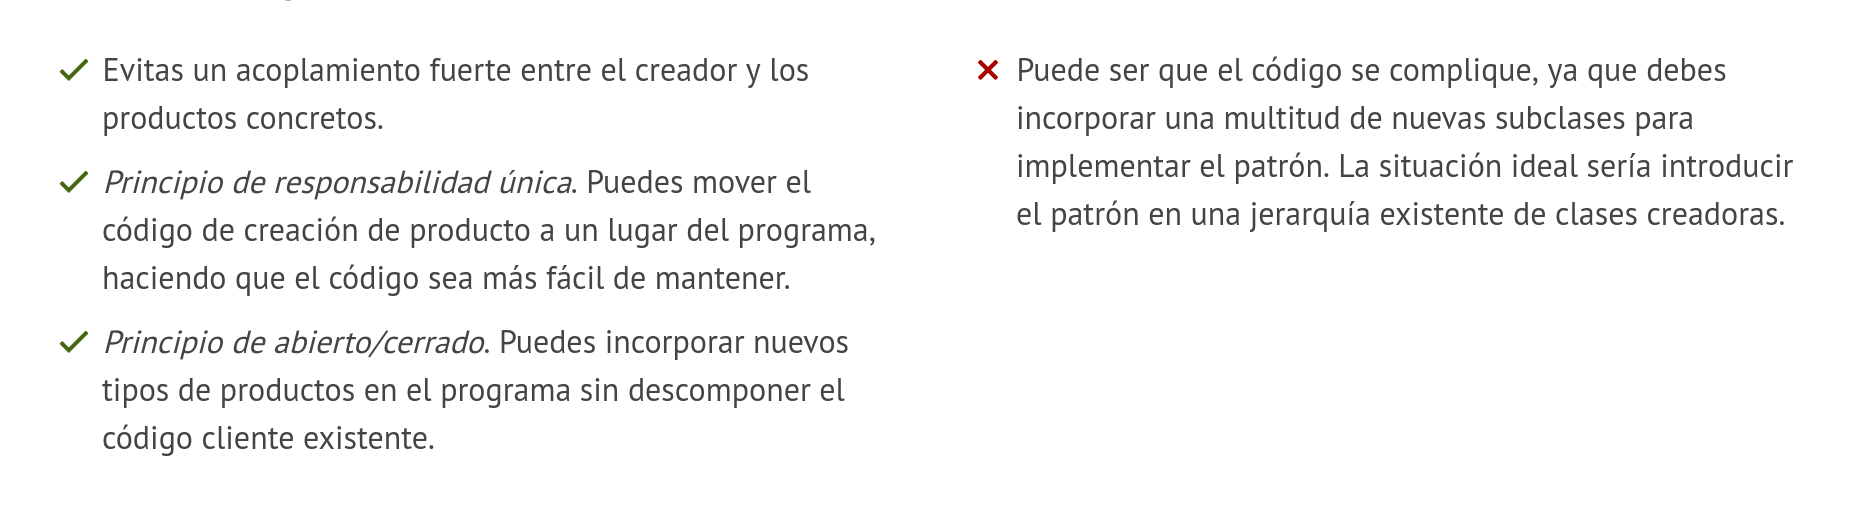

## Patrones creacionales - Prototype

Prototype es un patrón de diseño creacional que nos permite copiar objetos existentes sin que el código dependa de sus clases.

**Problema**

Digamos que tienes un objeto y quieres crear una copia exacta de él. ¿Cómo lo harías? En primer lugar, debes crear un nuevo objeto de la misma clase. Después debes recorrer todos los campos del objeto original y copiar sus valores en el nuevo objeto.

¡Bien! Pero hay ~una~ tres trampa. 

- No todos los objetos se pueden copiar de este modo, porque algunos de los campos del objeto pueden ser privados e invisibles desde fuera del propio objeto.
- Dado que debes conocer la clase del objeto para crear un duplicado, el código se vuelve dependiente de esa clase.
- En ocasiones tan solo conocemos la interfaz que sigue el objeto, pero no su clase concreta, cuando, por ejemplo, un parámetro de un método acepta cualquier objeto que siga cierta interfaz.

## Patrones creacionales - Prototype

El patrón Prototype delega el proceso de clonación a los propios objetos que están siendo clonados. El patrón declara una interfaz común para todos los objetos que soportan la clonación. Esta interfaz nos permite clonar un objeto sin acoplar el código a la clase de ese objeto. Normalmente, dicha interfaz contiene un único método `clonar`.

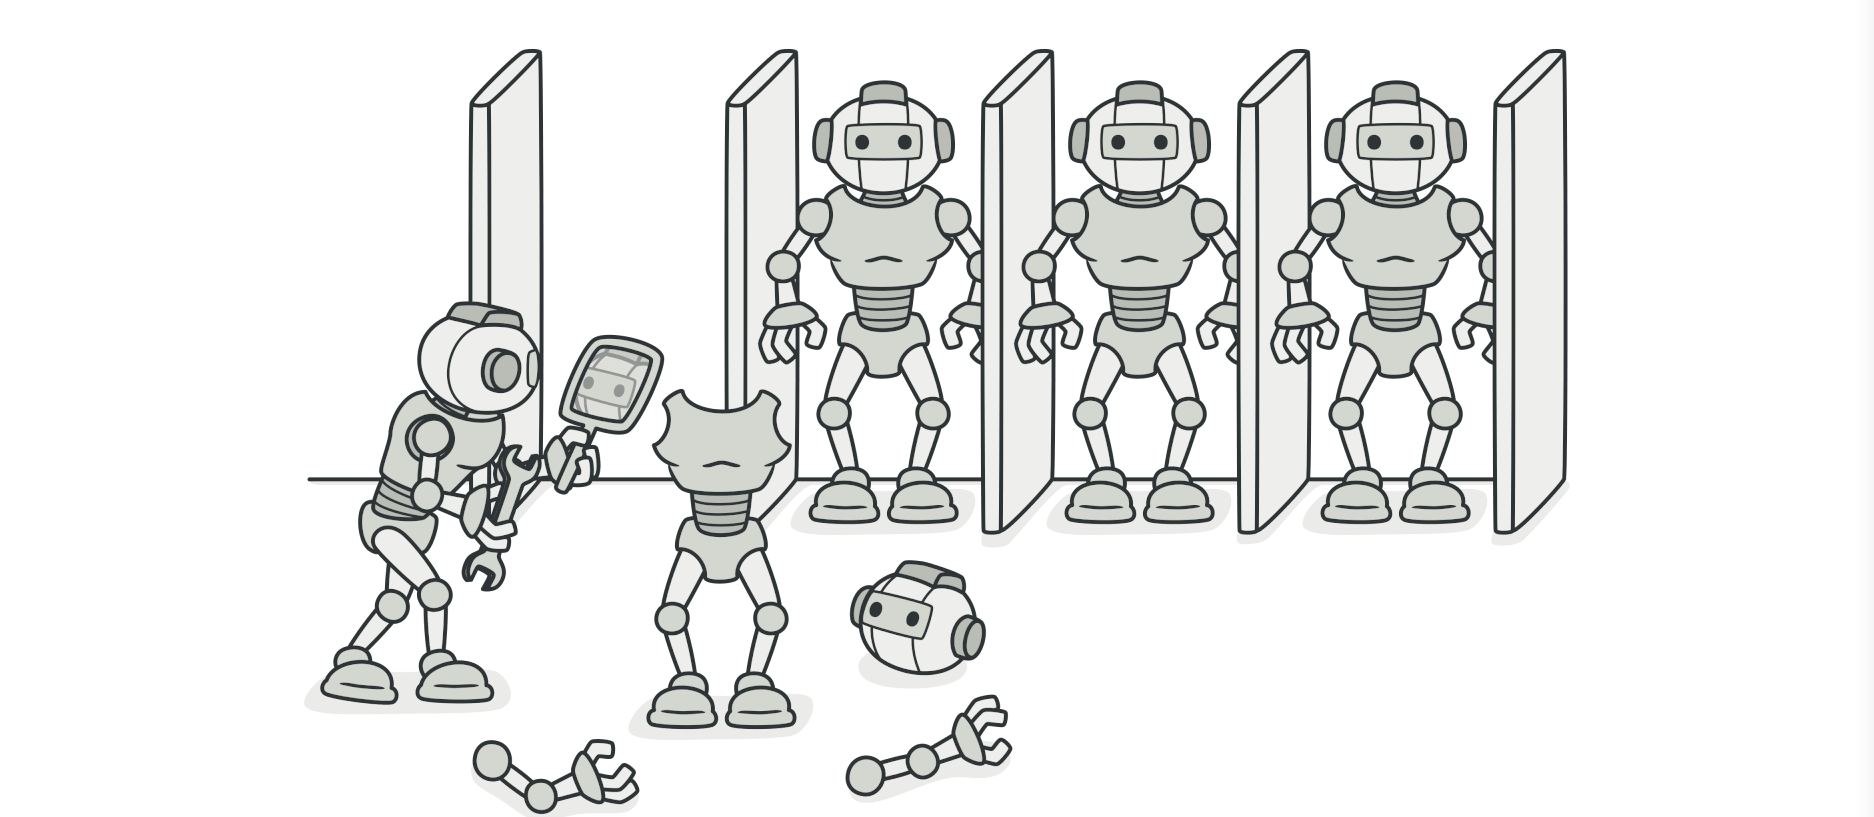

## Patrones creacionales - Prototype

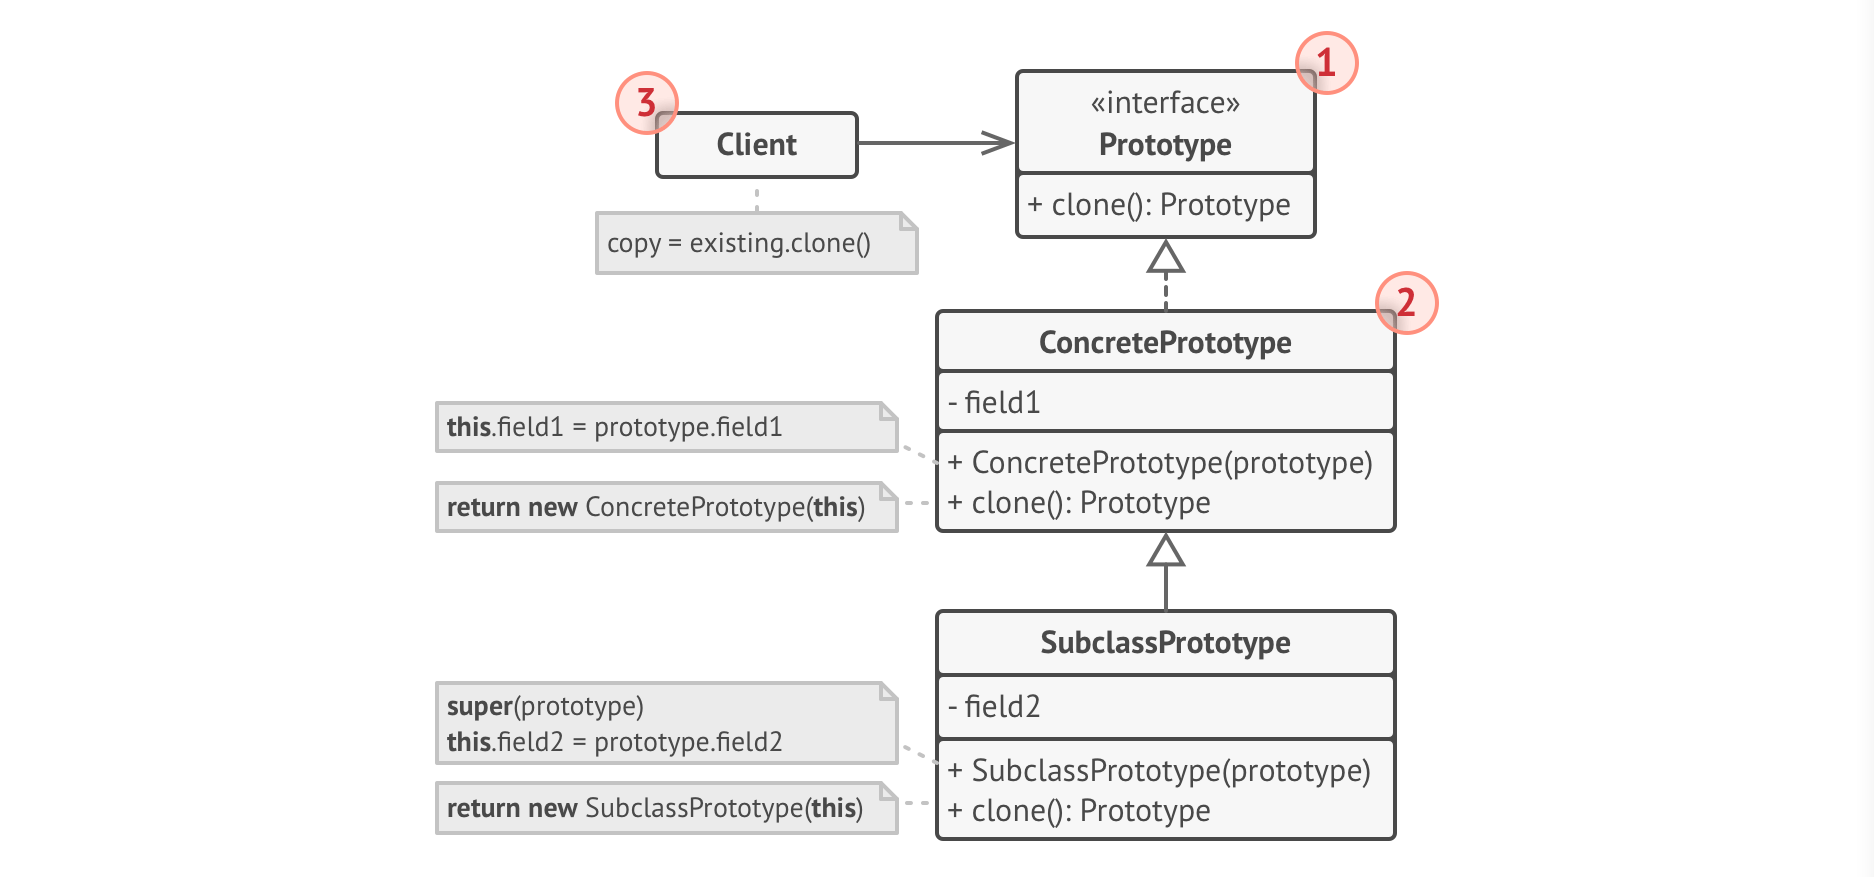

## Patrones creacionales - Prototype - Python

El patrón Prototype está disponible en Python listo para usarse con una módulo `copy`.

Por defecto utiliza dos dunders `__getstate__` y `__setstate__` que  retornan y reciben una copia del `__dict__` interno del objeto.

In [22]:
import copy

class Algo:
    def __init__(self, a):
        self._a = a
        
a1 = Algo("hola")
a2 = copy.copy(a1)


In [23]:
a1._a, a2._a

('hola', 'hola')

## Patrones creacionales - Prototype - Python

Por defecto `__getstate__` y `__setstate__`  hacen algo asi

In [36]:
import copy

class Algo:
    def __init__(self, a):
        self._a = a
        
    def __getstate__(self):
        state = dict(self.__dict__)
        print(state, "<<<< leyendo")
        return state
    
    def __setstate__(self, state):
        print(state, "<<<< escribiendo")
        self.__dict__.update(state)
        
a1 = Algo("hola")
a2 = copy.copy(a1)


{'_a': 'hola'} <<<< leyendo
{'_a': 'hola'} <<<< escribiendo


In [37]:
a1._a, a2._a

('hola', 'hola')

## Patrones creacionales - Prototype - Python

Usualmente `__getstate__` y `__setstate__`  no se redefinen para este tipo de cosas, ya que suelen interferir con serializaciones.

En cambio se ofrecen los métodos `__copy__` y `__deepcopy__` los cuales si estan disponibles se prefieren sobre los `__<set|get>state__`

In [39]:
import copy

class Algo:
    def __init__(self, a):
        self._a = a
        
    def __getstate__(self):
        state = dict(self.__dict__)
        print(state, "<<<< leyendo")
        return state
    
    def __setstate__(self, state):
        print(state, "<<<< escribiendo")
        self.__dict__.update(state)
        
    def __copy__(self):
        cls = type(self)
        return cls(a=self._a)
        
        
a1 = Algo("hola")
a2 = copy.copy(a1)


In [40]:
a1._a, a2._a

('hola', 'hola')

## Patrones creacionales - Prototype - Crítica

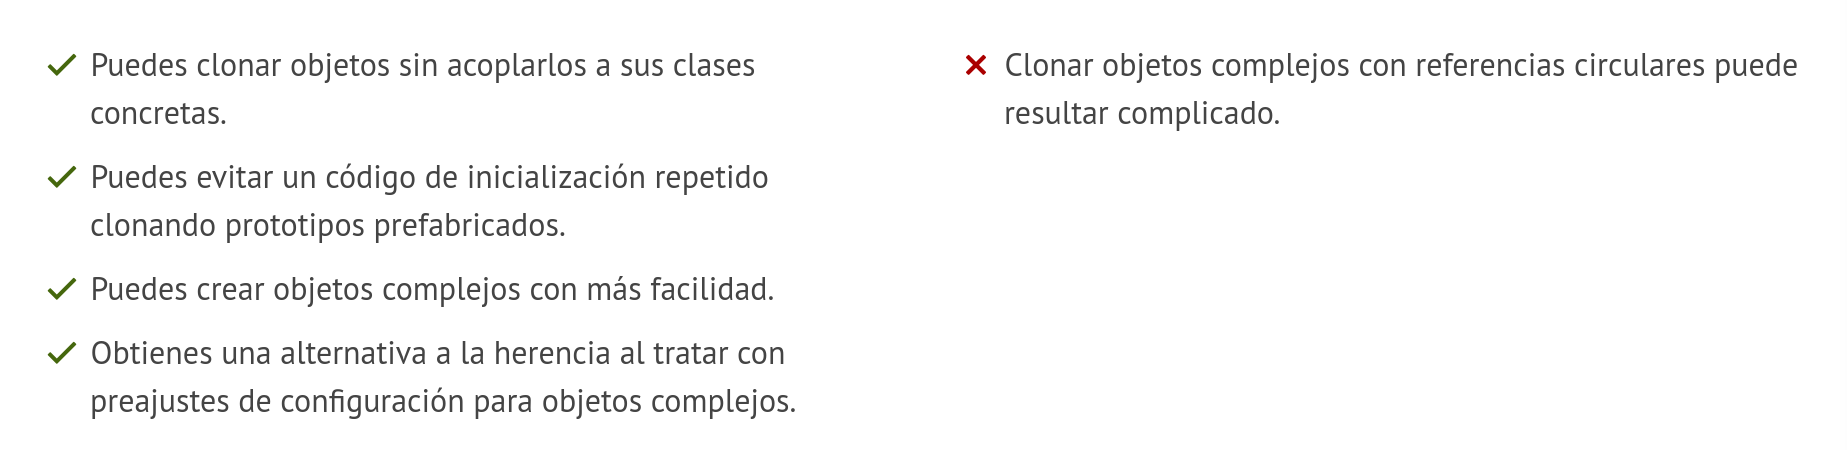

# Patrones estructurales

Los patrones **estructurales** explican cómo ensamblar objetos y clases en estructuras más grandes a la vez que se mantiene la flexibilidad y eficiencia de la estructura.

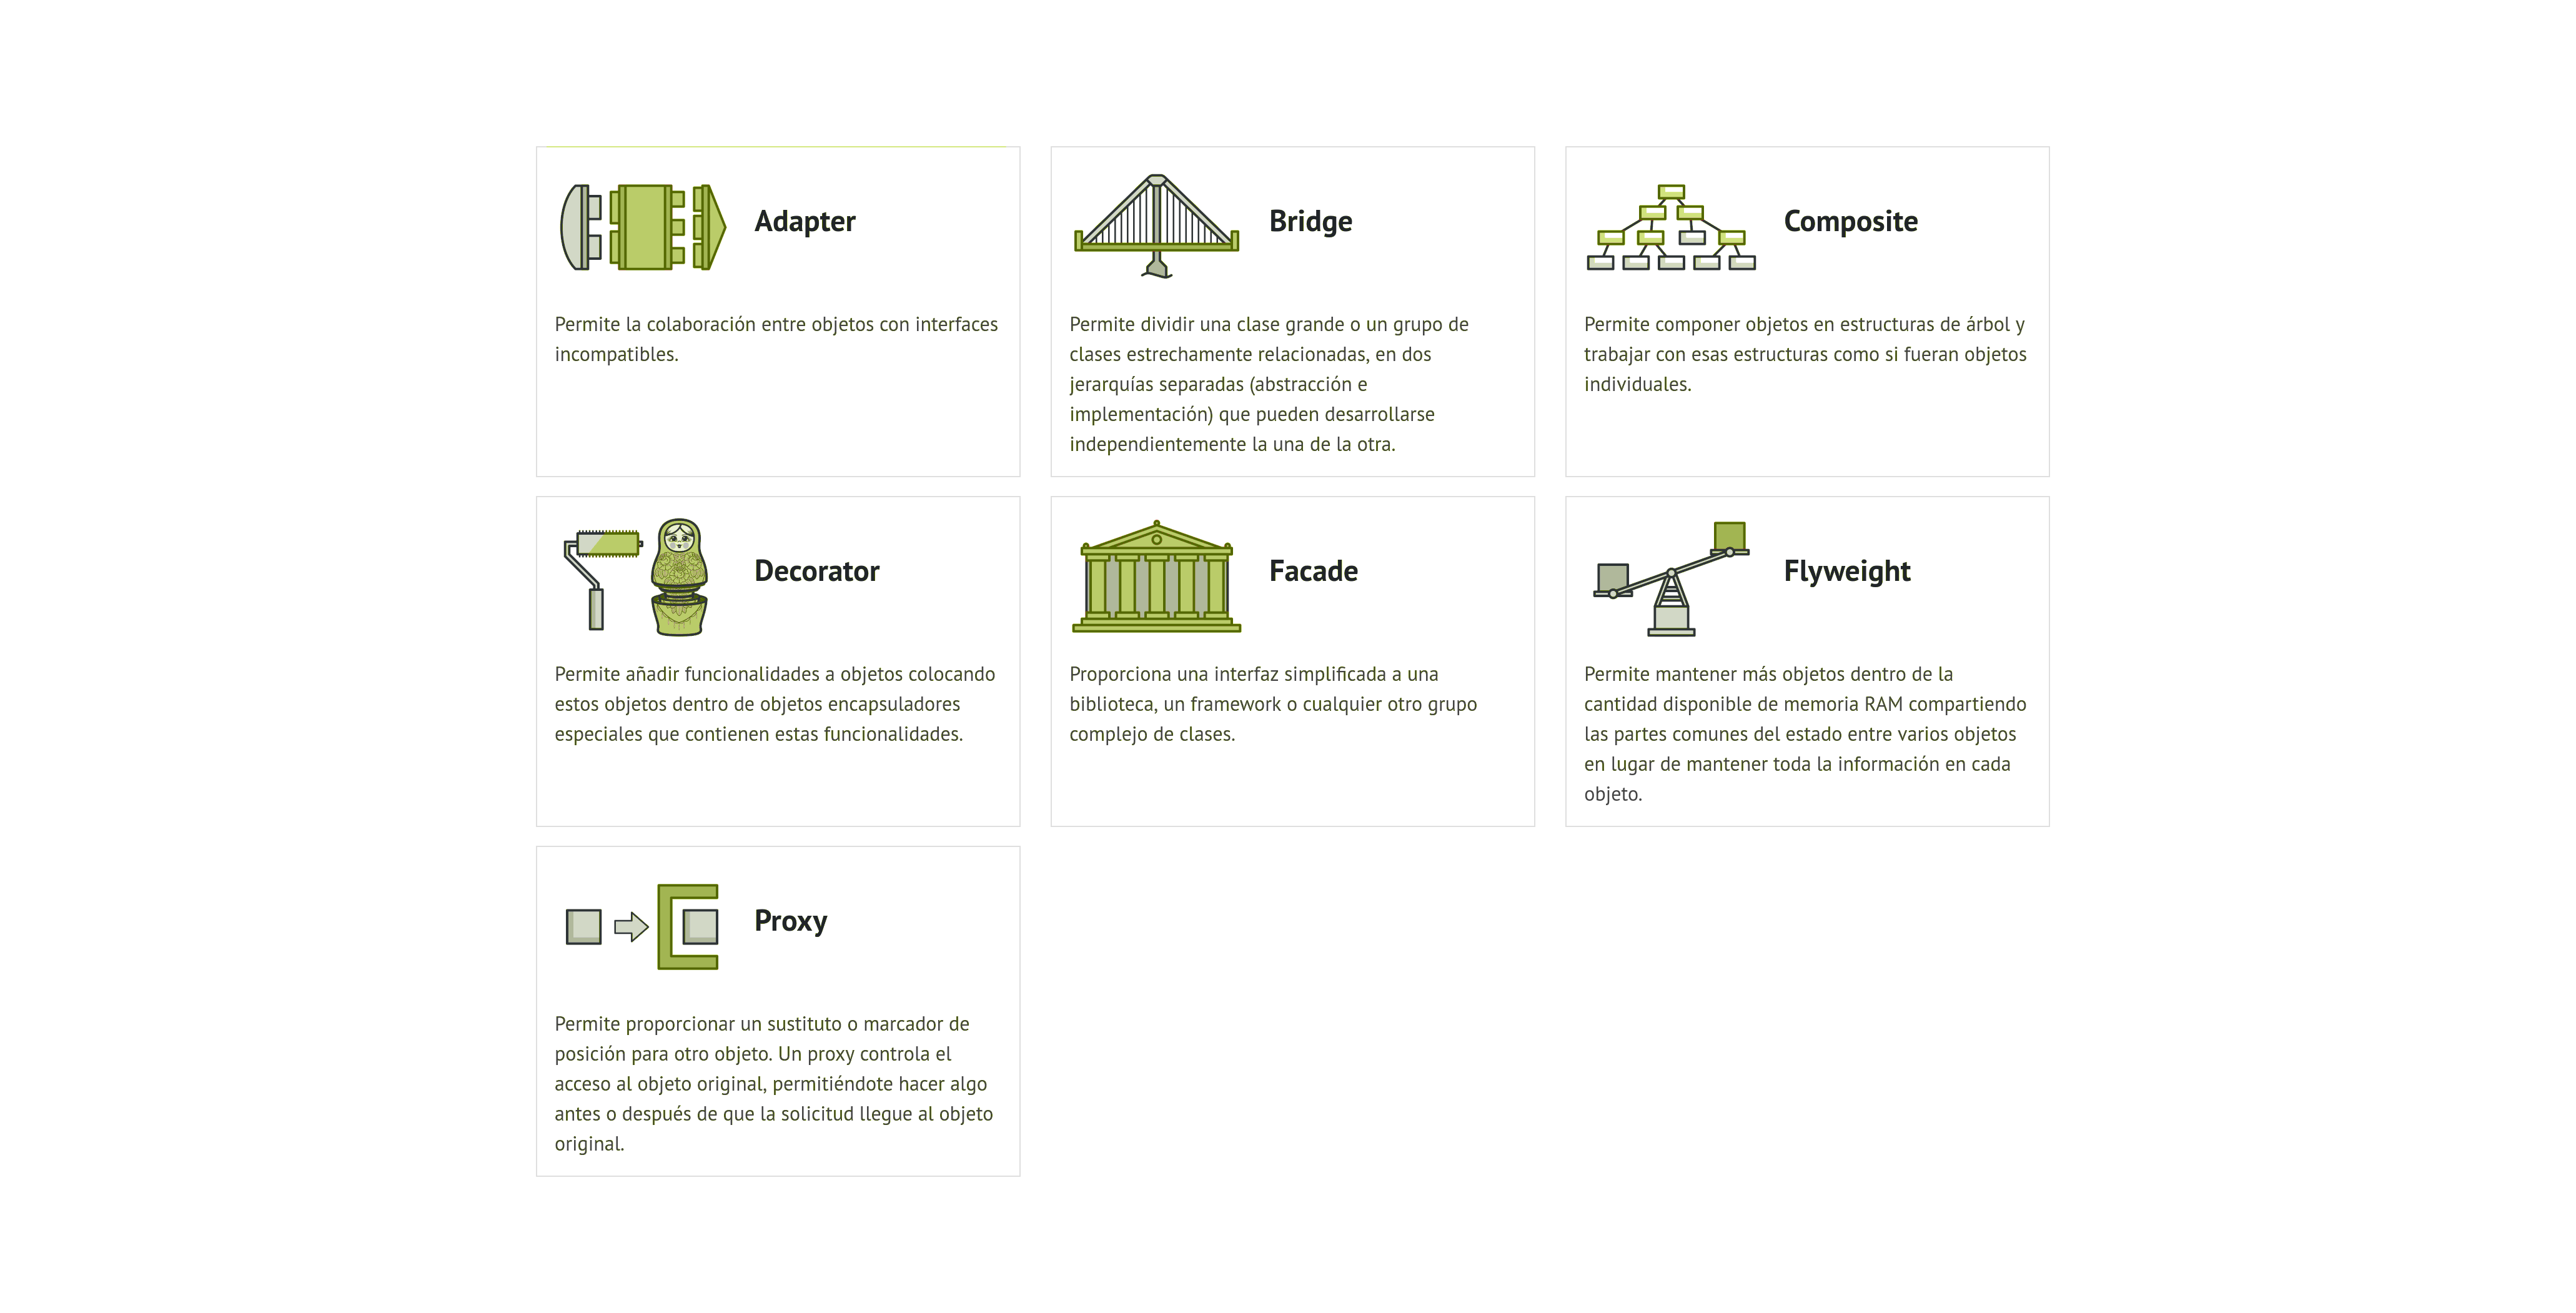

## Patrones estructurales - Decorador/Wrapper

Decorator es un patrón de diseño estructural que te permite añadir funcionalidades a objetos colocando estos objetos dentro de objetos encapsuladores especiales que contienen estas funcionalidades.

En particular python implementa la interfaz `@decorador`, pero no nos referimos a lo mismo.

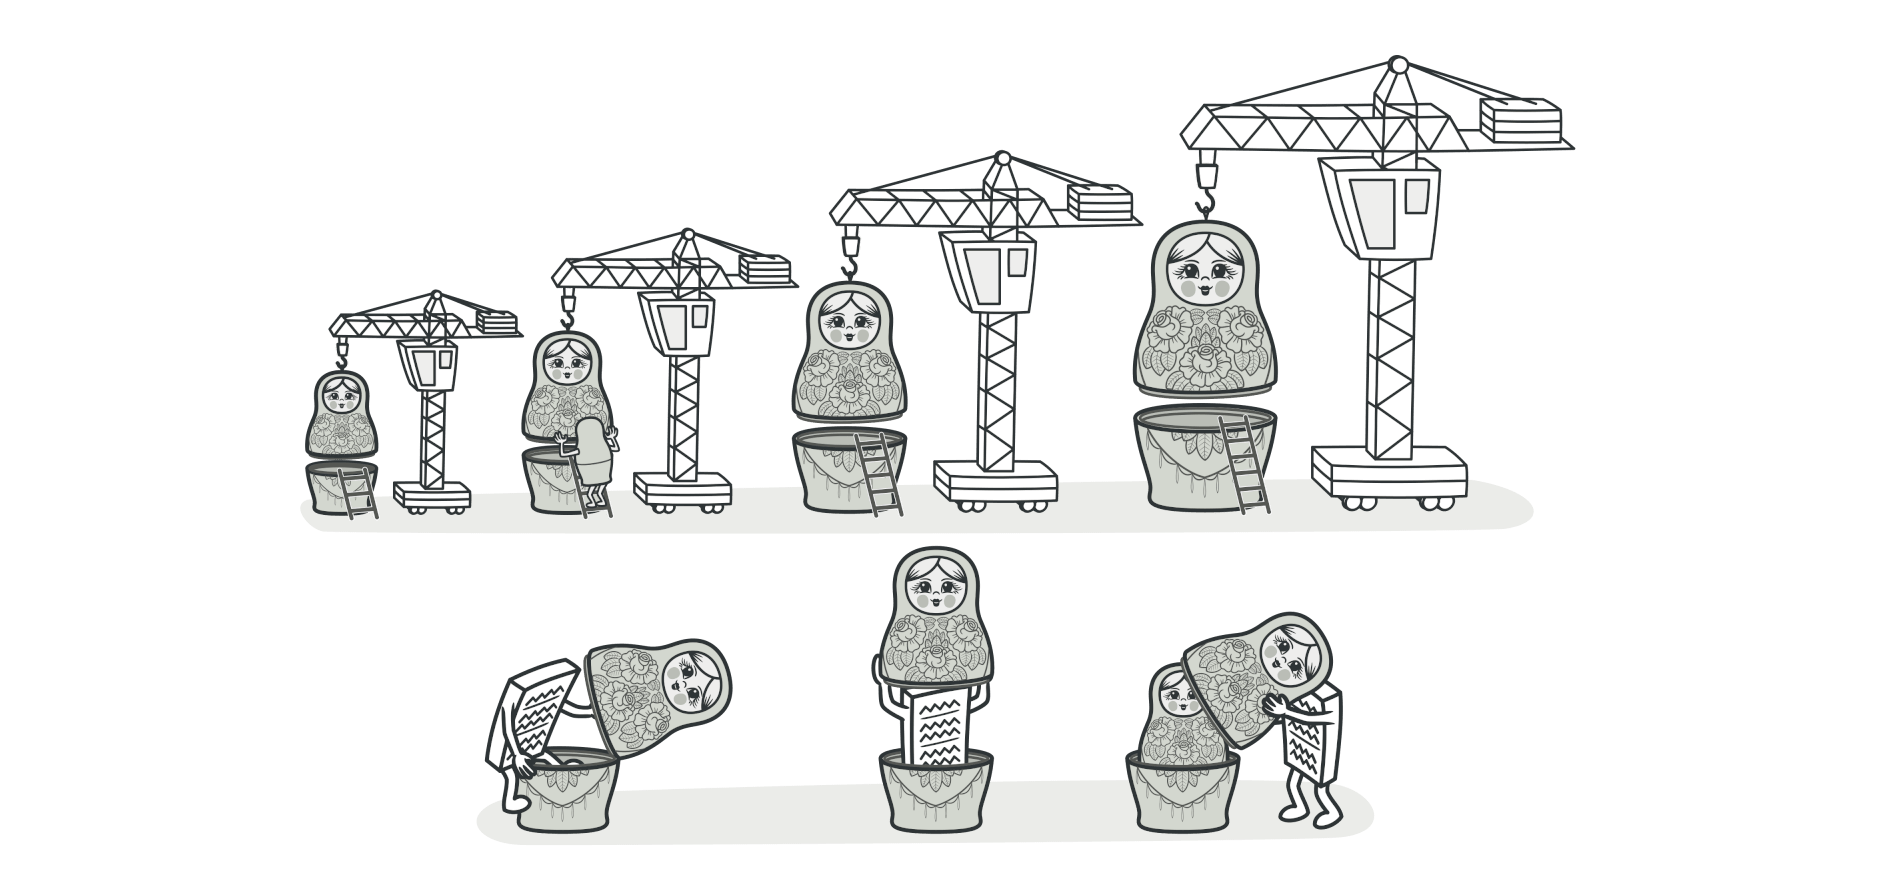

## Patrones estructurales - Decorador

La idea de un decorador OO es que vos no sepas si estas tratando con un decorador o el objeto real.

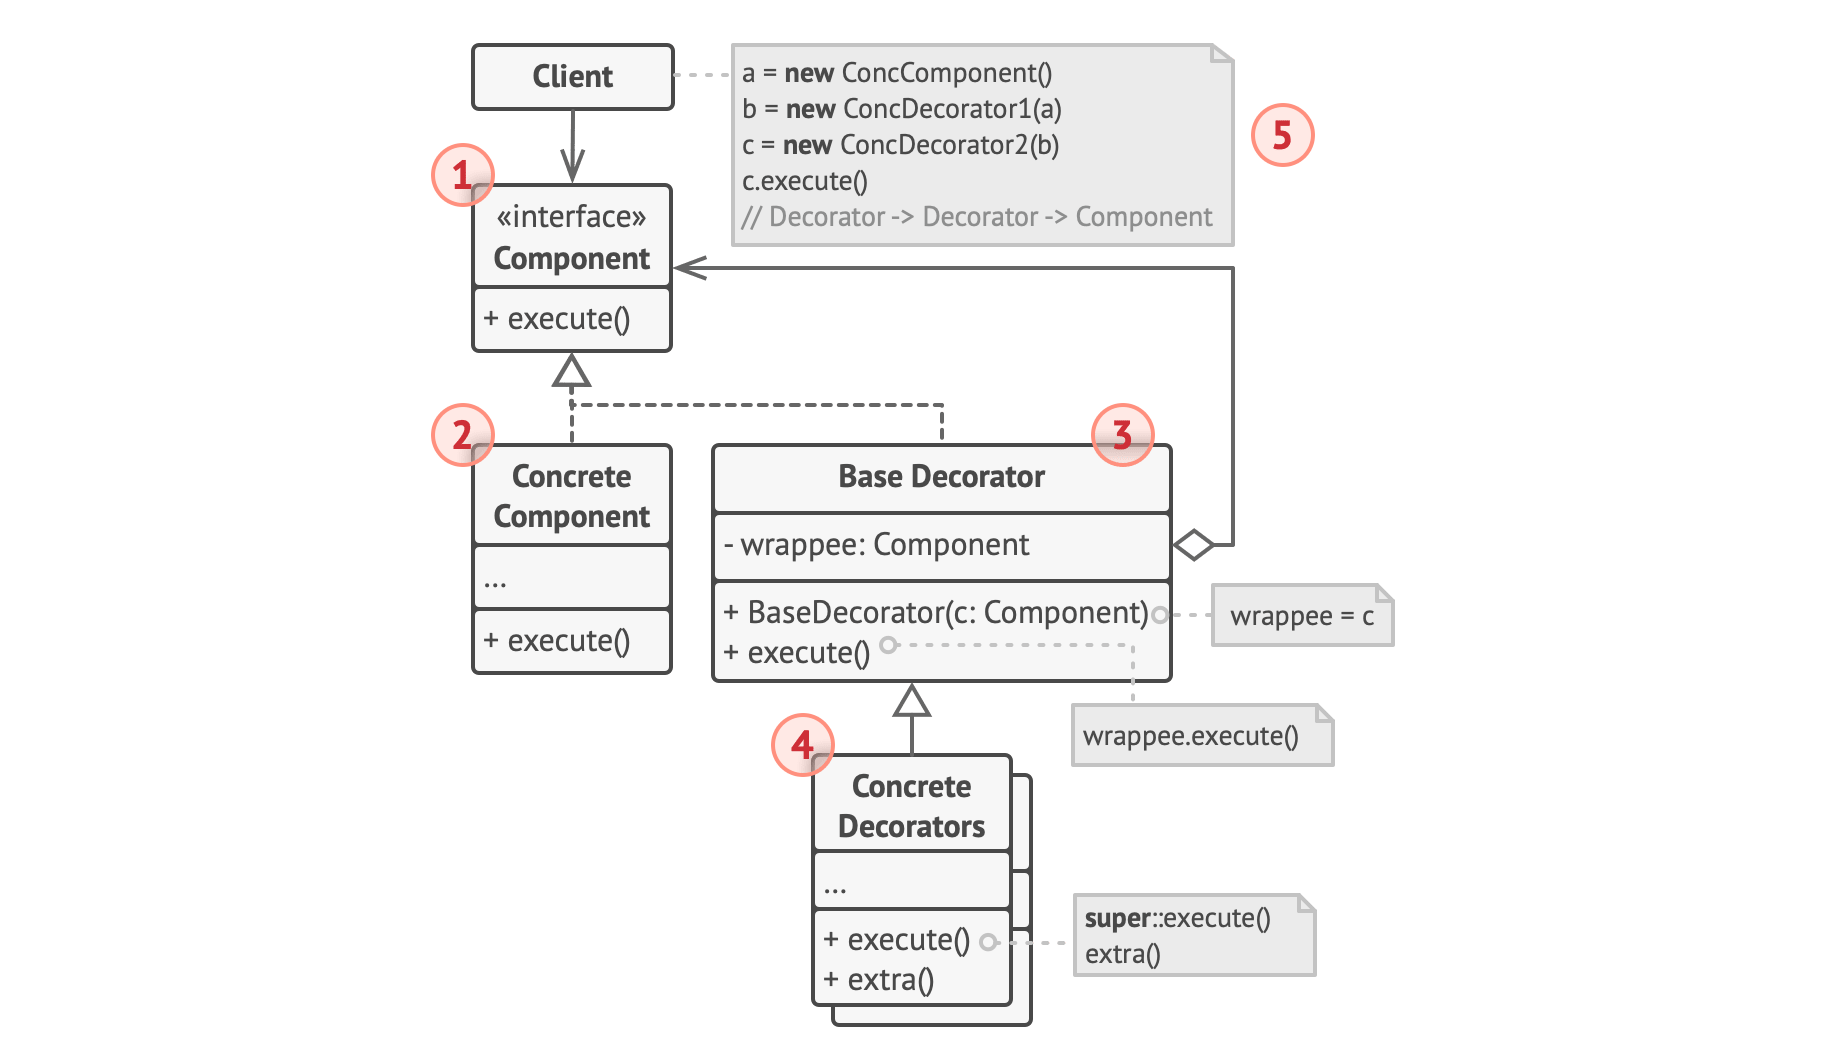

## Patrones estructurales - Decorador - Python

In [44]:
class AbstractCoffee:
    def get_cost(self): ...
    def get_ingredients(self): ...
        
    def get_tax(self):
        return 0.1 * self.get_cost()
    
    def get_name(self):
        return type(self).__name__
    
    def __repr__(self):
        name = self.get_name()
        cost = self.get_cost()
        ingredients = self.get_ingredients()
        tax = self.get_tax()
        return f"<{name} cost={cost}, ingredients={ingredients}, tax={tax}>"
    
    
class Coffee(AbstractCoffee):
    def get_cost(self):
        return 1.00
    
    def get_ingredients(self):
        return 'coffee'

coffee = Coffee()
coffee

<Coffee cost=1.0, ingredients=coffee, tax=0.1>

- Y si ahora quiero hacer cafe con leche?
- Y si quiero agregarle azucar?
- Y si quiero ponerle vainilla?

## Patrones estructurales - Decorador - Python

In [54]:
class AbstractCoffeeDecorator(AbstractCoffee): # Decoradores
    def __init__(self, coffee):
        self._coffee = coffee
    
    def get_cost(self):
        return self._coffee.get_cost()
    
    def get_ingredients(self):
        return self._coffee.get_ingredients()
    
    def get_name(self):
        coffee_name = self._coffee.get_name()
        my_name = type(self).__name__
        return f"{coffee_name}+{my_name}"
    
class Sugar(AbstractCoffeeDecorator):   
    def get_ingredients(self):
        return self._coffee.get_ingredients() + ', sugar'

class Milk(AbstractCoffeeDecorator):   
    def get_cost(self):
        return self._coffee.get_cost() + 0.25
   
    def get_ingredients(self):
        return self._coffee.get_ingredients() + ', milk'

In [55]:
Milk(Sugar(coffee))

<Coffee+Sugar+Milk cost=1.25, ingredients=coffee, sugar, milk, tax=0.125>

## Patrones estructurales - Decorador - Python

Suele usarse mas comunmente de esta forma, lo que llamamos un **Patrón Adapter**

In [59]:
import pandas as pd

class MyDF:
    
    def __init__(self, df):
        self._df = df
        
    def __getattr__(self, a):
        return getattr(self._df, a)
    
    def mi_estadistica_copada(self):
        return 42.
    
df = pd.DataFrame([[1,2], [3,4]], columns=["a", "b"])
df = MyDF(df)
df

In [60]:
df.mean()

a    2.0
b    3.0
dtype: float64

In [61]:
df.mi_estadistica_copada()

42.0

## Patrones estructurales - Decorador - Criticas

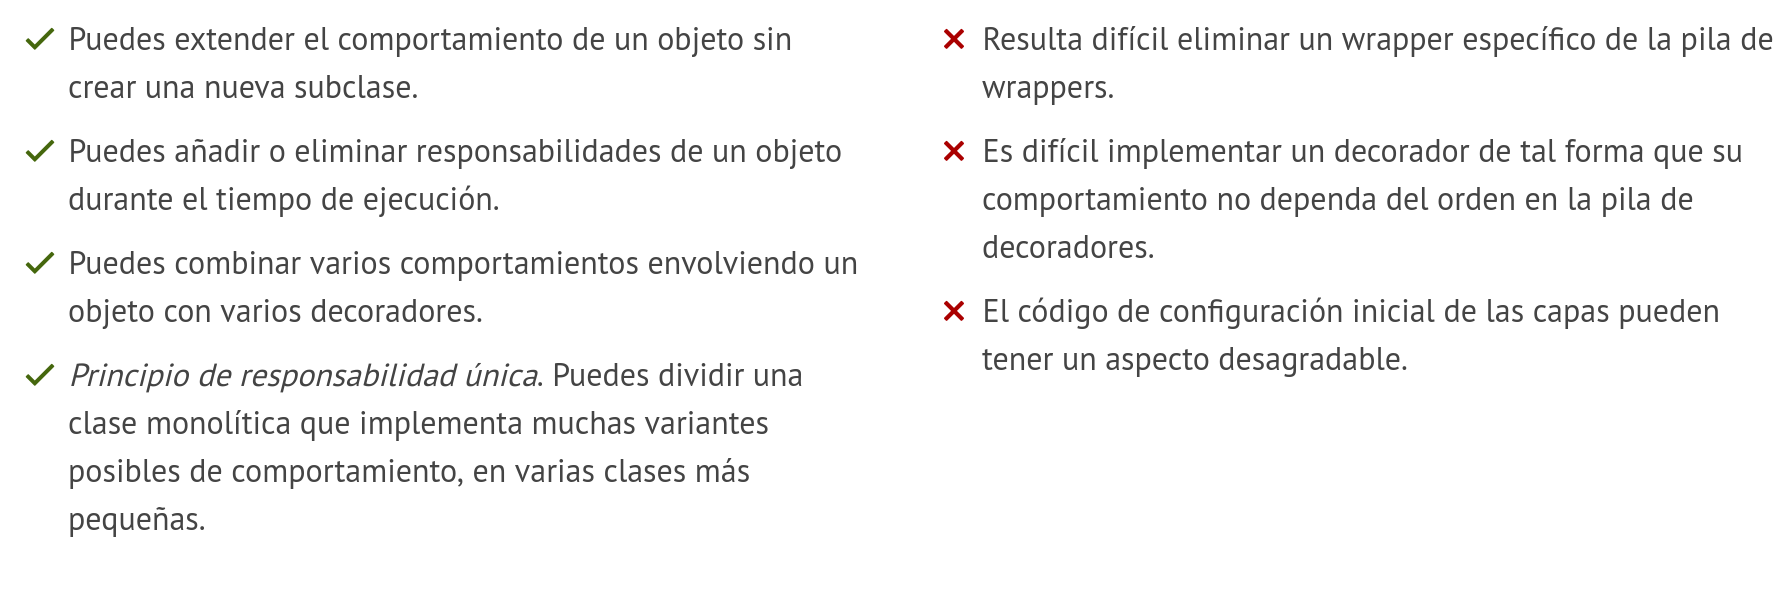

## Patrones estructurales - Decorador - Algunas relaciones con otros patrones



- **Adapter** cambia la interfaz de un objeto existente mientras que **Decorator* mejora un objeto sin cambiar su interfaz. Además, 

- **Decorator** soporta la composición recursiva, lo cual no es posible al utilizar **Adapter**.

- **Adapter** proporciona una interfaz diferente al objeto envuelto, **Proxy** le proporciona la misma interfaz y **Decorator** le proporciona una interfaz mejorada.


## Patrones estructurales - Flyweight/Monostate/Borg

Flyweight es un patrón de diseño estructural que te permite mantener más objetos dentro de la cantidad disponible de RAM compartiendo las partes comunes del estado entre varios objetos en lugar de mantener toda la información en cada objeto.

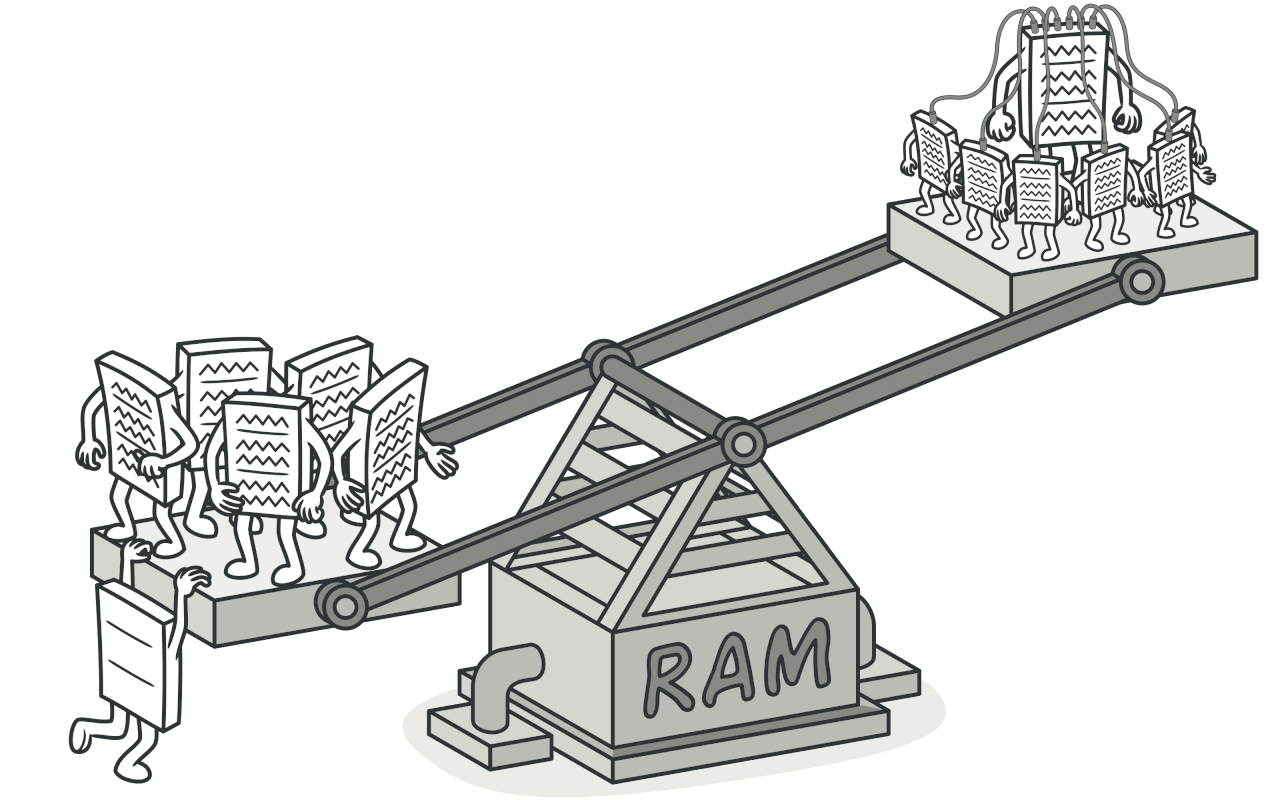

## Patrones estructurales - Flyweight/Monostate/Borg

Imaginando un videojuego

- En la clase Partícula, los campos de color y sprite consumen mucha más memoria que otros campos. 
- Además esos dos campos almacenan información casi idéntica de todas las partículas. Por ejemplo, todas las balas tienen el mismo color y sprite.

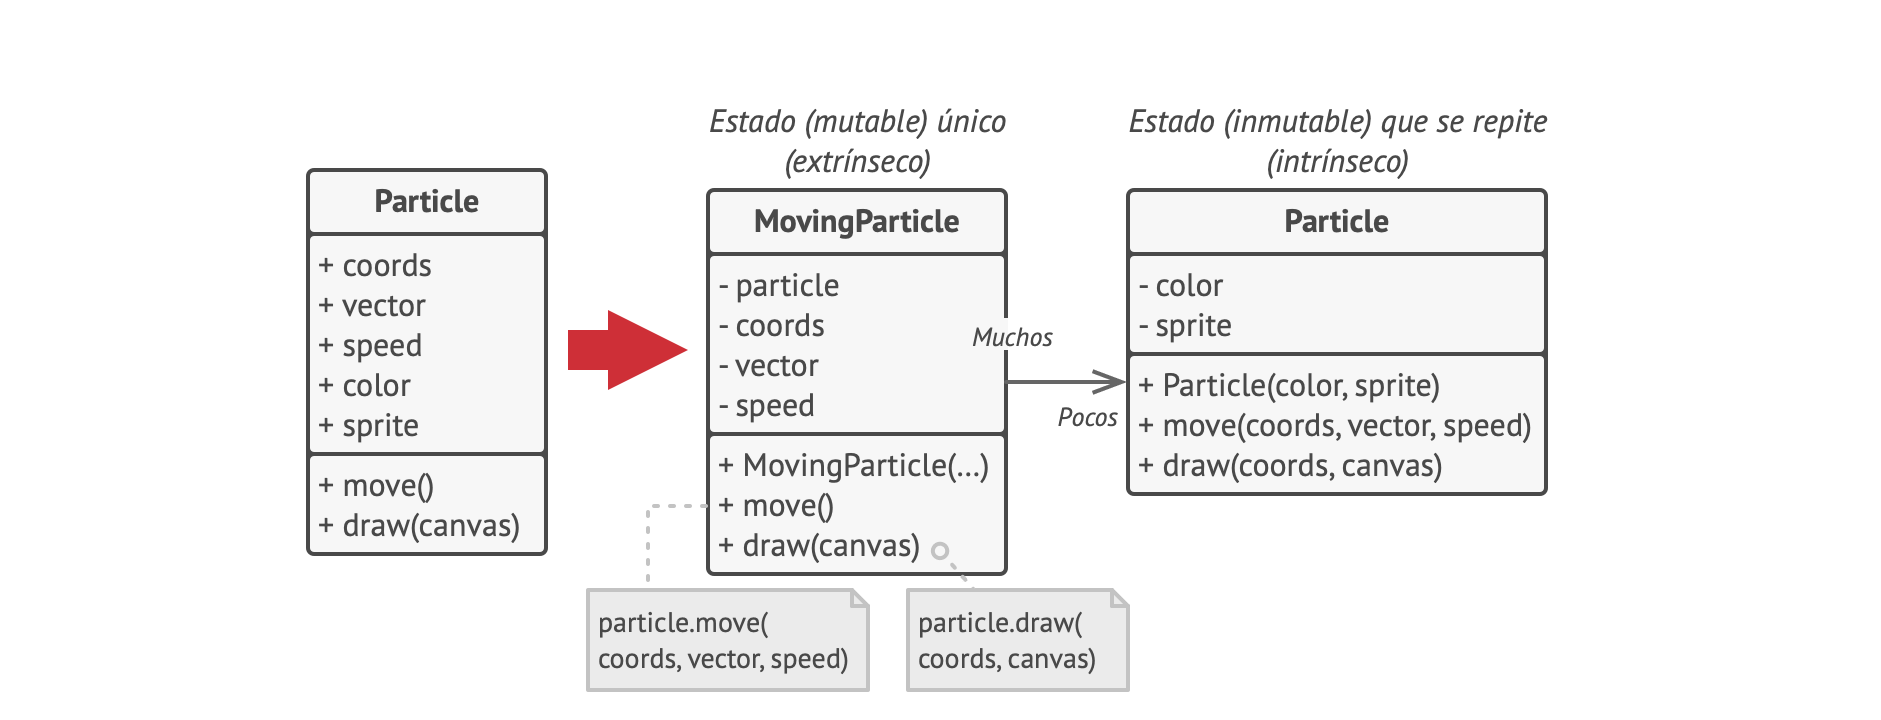

## Patrones estructurales - Flyweight/Monostate/Borg

Empecemos metiendo todos los datos en un único estado compartido

In [79]:
class MonoState:  # o Borg
    
    _state = {}
    
    def __new__(cls, *args, **kwargs):
        obj = super().__new__(cls)
        obj.__dict__ = cls._state
        return obj

class MovingParticle(MonoState):
    def __init__(self, *xyz):
        if xyz:
            self.x, self.y, self.z = xyz
    def __repr__(self):
        return f"<MovingParticle {self.__dict__}>"
    

obj = MovingParticle(1,2,3)
obj

<MovingParticle {'x': 1, 'y': 2, 'z': 3}>

In [80]:
obj2 = MovingParticle()
obj2

<MovingParticle {'x': 1, 'y': 2, 'z': 3}>

In [81]:
obj2.o = 1
obj

<MovingParticle {'x': 1, 'y': 2, 'z': 3, 'o': 1}>

## Patrones estructurales - Flyweight/Monostate/Borg

Vamos a achicar "parte" de los datos

In [86]:
class Flyweight:
    
    _state = {}
    _shared_vars = ("x", "y", "z")
    
    def __setattr__(self, a, v):
        if a in self._shared_vars:
            self._state[a] = v
        else:
            super().__setattr__(a, v)

            
class MovingParticle(Flyweight):
    def __init__(self, *xyz):
        if xyz:
            self.x, self.y, self.z = xyz
    
    def __repr__(self):
        return f"<MovingParticle self={self.__dict__} shared={self._state})>"
    

obj = MovingParticle(1,2,3)
obj

<MovingParticle self={} shared={'x': 1, 'y': 2, 'z': 3})>

In [84]:
obj2 = MovingParticle()
obj2.o = "zaraza"

obj2

<MovingParticle self={'o': 'zaraza'} shared={'x': 1, 'y': 2, 'z': 3})>

In [85]:
obj

<MovingParticle self={} shared={'x': 1, 'y': 2, 'z': 3})>

## Patrones estructurales - Flyweight/Monostate/Borg - Criticas


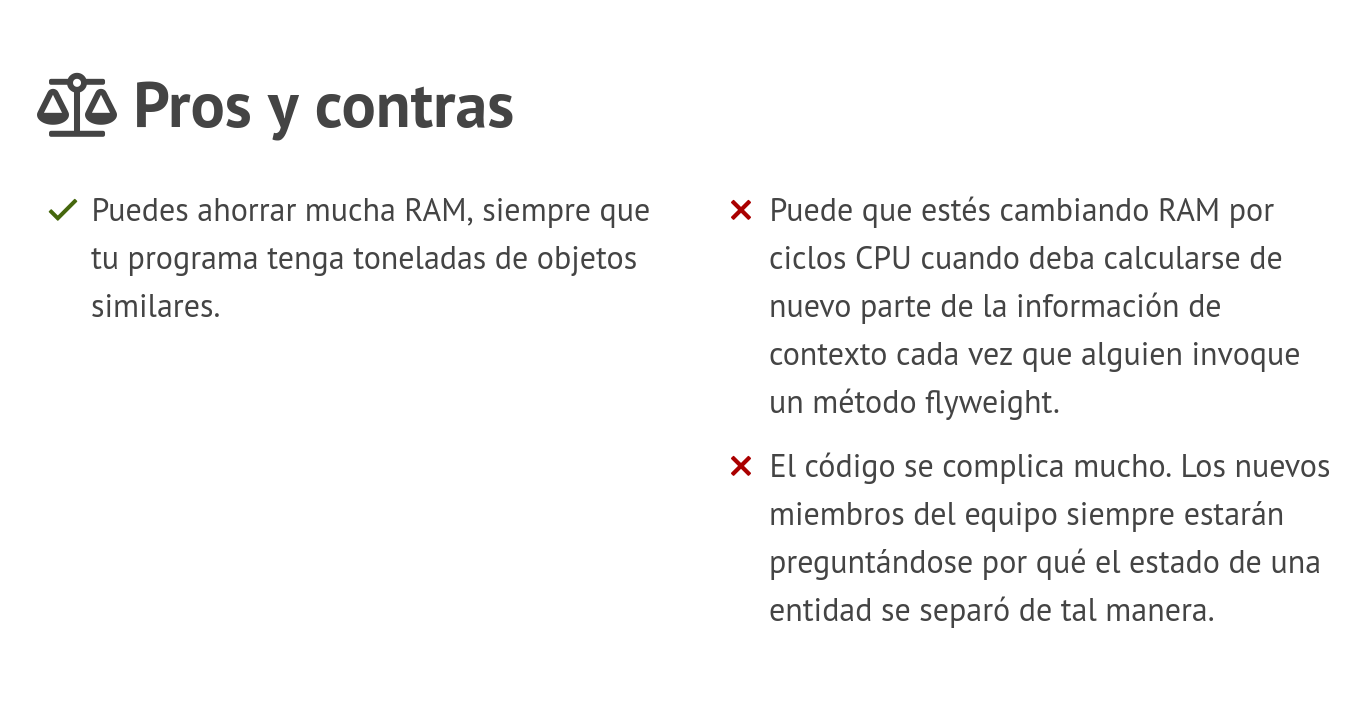

Además el Monostate es un singleton mas disfrazado